# Imports

In [50]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from matplotlib import pyplot as plt
import seaborn as sns
%pyplot inline

ERROR: Line magic function `%pyplot` not found.


# Loading the data

In [51]:
df = pd.read_csv("~/Downloads/titanic_data.csv")

# Exploring and cleaning up the data

In [52]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

I guess an object is a string?  Looking at these, is there anything that needs to be fixed?  One thing is that I would like to do correlations with the 'Sex' entry, so it I would like to cast it as boolean/numerical. 

In [54]:
def is_female(input):
    if input == "male":
        return False
    if input == "female":
        return True
    else:
        return input

all = df.applymap(is_female)

In [55]:
all.columns.values[4] = 'IsFemale'

In [56]:
all.head()

,PassengerId,Survived,Pclass,Name,IsFemale,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",False,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",True,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",False,35.0,0,0,373450,8.0500,NaN,S


Let's add a column to do the same thing for children.

In [57]:
def is_child(row):
    if row['Age'] > 15.0:
        return False
    if row['Age'] <= 15.0:
        return True
    else:
        return row['Age']

all['IsChild'] = all.apply(is_child, axis=1)


In [58]:
all.head()

,PassengerId,Survived,Pclass,Name,IsFemale,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsChild
0,1,0,3,"Braund, Mr. Owen Harris",False,22.0,1,0,A/5 21171,7.2500,NaN,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",True,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True,35.0,1,0,113803,53.1000,C123,S,False
4,5,0,3,"Allen, Mr. William Henry",False,35.0,0,0,373450,8.0500,NaN,S,False


In [59]:
all.corr()

,PassengerId,Survived,Pclass,IsFemale,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
IsFemale,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


So, we see that there is strong correlation of survival with IsFemale and negative correlation with high Pclass. All that is expected.  But where are the IsChild correlations?

In [60]:
all.dtypes


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
IsFemale          bool
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
IsChild         object
dtype: object

isChild has dtype object, not bool, so we need to cast it as bool.

In [61]:
all['IsChild'] = (all['IsChild']).astype(bool)


all

Something's wrong here, not sure what.

# Question: Were married women more likely to stay behind?

We know that women often had to get on life boats without their husbands and that some women chose to stay behind. 

So, question:  Were unmarried women more likely to survive than married women?

The first step is to separate the women into married and unmarried so that we can look at the mean survival rate.


## Labeling women as married or unmarried

In [62]:
women = all[(all["IsFemale"] == 1) & (all['IsChild'] == 0)]

In [63]:
women.head()

,PassengerId,Survived,Pclass,Name,IsFemale,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsChild
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",True,38.0,1,0,PC 17599,71.2833,C85,C,False
2,3,1,3,"Heikkinen, Miss. Laina",True,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",True,35.0,1,0,113803,53.1000,C123,S,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",True,27.0,0,2,347742,11.1333,NaN,S,False
11,12,1,1,"Bonnell, Miss. Elizabeth",True,58.0,0,0,113783,26.5500,C103,S,False


In [64]:
women.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,445.004587,0.775229,1.954128,32.000000,0.513761,0.614679,50.794037
std,256.862826,0.418392,0.841168,11.495441,0.757326,1.093831,64.508571
min,2.000000,0.000000,1.000000,16.000000,0.000000,0.000000,6.750000
25%,255.250000,1.000000,1.000000,23.000000,0.000000,0.000000,13.000000
50%,425.500000,1.000000,2.000000,30.000000,0.000000,0.000000,26.000000
75%,654.250000,1.000000,3.000000,39.000000,1.000000,1.000000,70.575000
max,888.000000,1.000000,3.000000,63.000000,5.000000,6.000000,512.329200


Since this is just grown women, let's drop the columns for IsFemale and IsChild.

In [65]:
women = women.drop('IsFemale', 1)
women = women.drop('IsChild', 1)


In [66]:
women.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,S


All of the passenger entries seem to have an title, so we'll try using that to distinguish whether women are unmarried.

In [67]:
married_women = women[women["Name"].str.contains("Mrs")]

In [68]:
women['IsMarried'] = women["Name"].str.contains("Mrs")

In [69]:
women.head()


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsMarried
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,True
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,True
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,S,True
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,S,False


In [70]:
women.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,445.004587,0.775229,1.954128,32.000000,0.513761,0.614679,50.794037
std,256.862826,0.418392,0.841168,11.495441,0.757326,1.093831,64.508571
min,2.000000,0.000000,1.000000,16.000000,0.000000,0.000000,6.750000
25%,255.250000,1.000000,1.000000,23.000000,0.000000,0.000000,13.000000
50%,425.500000,1.000000,2.000000,30.000000,0.000000,0.000000,26.000000
75%,654.250000,1.000000,3.000000,39.000000,1.000000,1.000000,70.575000
max,888.000000,1.000000,3.000000,63.000000,5.000000,6.000000,512.329200


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1217a8290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x122d32410>]], dtype=object)

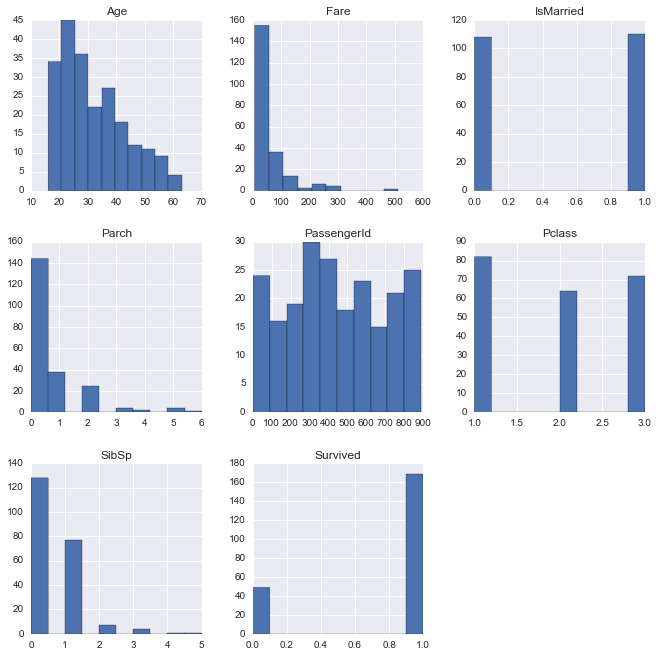

In [71]:
%matplotlib inline 
women.hist(figsize=(11,11))

In [72]:
women.groupby('IsMarried').describe()

Age        Fare       Parch  PassengerId      Pclass  \
IsMarried                                                                      
False     count  108.000000  108.000000  108.000000   108.000000  108.000000   
          mean    27.898148   57.027585    0.324074   421.120370    1.944444   
          std     10.271719   78.961408    0.694823   241.645361    0.894775   
          min     16.000000    6.750000    0.000000     3.000000    1.000000   
          25%     21.000000    8.803125    0.000000   240.000000    1.000000   
          50%     25.000000   14.456250    0.000000   389.000000    2.000000   
          75%     32.625000   79.050000    0.000000   619.000000    3.000000   
          max     63.000000  512.329200    2.000000   888.000000    3.000000   
True      count  110.000000  110.000000  110.000000   110.000000  110.000000   
          mean    36.027273   44.673826    0.900000   468.454545    1.963636   
          std     11.245761   45.691692    1.319925   270.019423    0.788999   
          min     17.000000    8.683300    0.000000     2.000000    1.000000   
          25%     27.250000   16.250000    0.000000   257.000000    1.000000   
          50%     35.000000   26.000000    0.000000   479.000000    2.000000   
          75%     44.000000   55.200000    1.000000   710.000000    3.000000   
          max     63.000000  247.520800    6.000000   886.000000    3.000000   

                      SibSp    Survived  
IsMarried                                
False     count  108.000000  108.000000  
          mean     0.333333    0.768519  
          std      0.842781    0.423746  
          min      0.000000    0.000000  
          25%      0.000000    1.000000  
          50%      0.000000    1.000000  
          75%      0.000000    1.000000  
          max      5.000000    1.000000  
True      count  110.000000  110.000000  
          mean     0.690909    0.781818  
          std      0.616969    0.414902  
          min      0.000000    0.000000  
          25%      0.000000    1.000000  
          50%      1.000000    1.000000  
          75%      1.000000    1.000000  
          max      3.000000    1.000000

In [73]:
women.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000,218.000000
mean,445.004587,0.775229,1.954128,32.000000,0.513761,0.614679,50.794037
std,256.862826,0.418392,0.841168,11.495441,0.757326,1.093831,64.508571
min,2.000000,0.000000,1.000000,16.000000,0.000000,0.000000,6.750000
25%,255.250000,1.000000,1.000000,23.000000,0.000000,0.000000,13.000000
50%,425.500000,1.000000,2.000000,30.000000,0.000000,0.000000,26.000000
75%,654.250000,1.000000,3.000000,39.000000,1.000000,1.000000,70.575000
max,888.000000,1.000000,3.000000,63.000000,5.000000,6.000000,512.329200


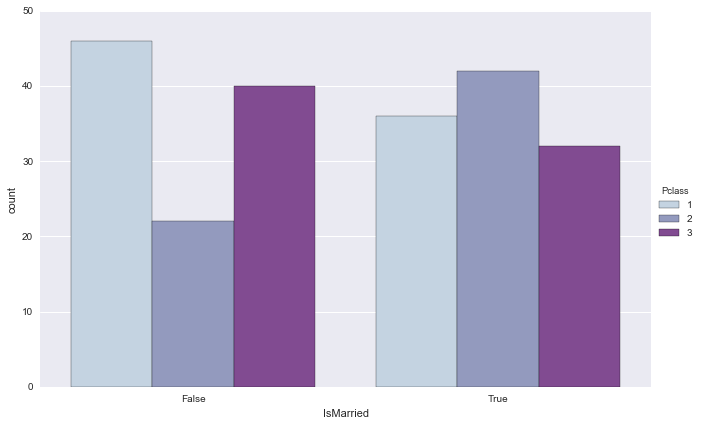

In [78]:
sns.factorplot(x="Survived", data=women, kind="count",
                   palette="BuPu", size=6, aspect=1.5, hue='IsMarried')

So the answer to our first question is kind of boring and confirms the null hypothesis.  The difference in the mean survival rate for married and unmarried women (.078 and .077) are indistiguishable.  But maybe this effect only happened in the higher classes of service?  Let's break it down by class of service and marital status and have a look.

In [48]:
women.groupby('IsMarried', as_index=False)['Survived'].mean()
print 'Mean survival for married women'
women[women['IsMarried']].groupby('Pclass', as_index=False)['Survived'].mean()


Mean survival for married women


,Pclass,Survived
0,1,0.972222
1,2,0.880952
2,3,0.437500


In [43]:
print 'Mean survival for unmarried women'
women[~women['IsMarried']].groupby('Pclass', as_index=False)['Survived'].mean()

Mean survival for unmarried women


,Pclass,Survived
0,1,0.978261
1,2,0.954545
2,3,0.425000


In [24]:
women.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,IsMarried
PassengerId,1.000000,0.017376,-0.124087,0.086596,-0.092093,0.123856,0.050380,0.092347
Survived,0.017376,1.000000,-0.540100,0.072340,-0.055640,-0.169980,0.258272,0.015930
Pclass,-0.124087,-0.540100,1.000000,-0.279035,-0.006238,0.166016,-0.606034,0.011434
Age,0.086596,0.072340,-0.279035,1.000000,-0.043935,0.042147,0.125604,0.354379
SibSp,-0.092093,-0.055640,-0.006238,-0.043935,1.000000,0.217824,0.152339,0.236611
Parch,0.123856,-0.169980,0.166016,0.042147,0.217824,1.000000,0.064443,0.263856
Fare,0.050380,0.258272,-0.606034,0.125604,0.152339,0.064443,1.000000,-0.095969
IsMarried,0.092347,0.015930,0.011434,0.354379,0.236611,0.263856,-0.095969,1.000000


In [25]:
married_women.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,468.454545,0.781818,1.963636,36.027273,0.690909,0.900000,44.673826
std,270.019423,0.414902,0.788999,11.245761,0.616969,1.319925,45.691692
min,2.000000,0.000000,1.000000,17.000000,0.000000,0.000000,8.683300
25%,257.000000,1.000000,1.000000,27.250000,0.000000,0.000000,16.250000
50%,479.000000,1.000000,2.000000,35.000000,1.000000,0.000000,26.000000
75%,710.000000,1.000000,3.000000,44.000000,1.000000,1.000000,55.200000
max,886.000000,1.000000,3.000000,63.000000,3.000000,6.000000,247.520800


In [26]:
unmarried_women = df[df["Name"].str.contains("Miss")]

In [27]:
unmarried_women.head()

,PassengerId,Survived,Pclass,Name,IsFemale,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
22,23,1,3,"McGowan, Miss. Anna ""Annie""",female,15.0,0,0,330923,8.0292,NaN,Q


In [28]:
unmarried_women.describe()

ValueError: cannot reindex from a duplicate axis

In [17]:
classified_women = married_women.append(unmarried_women)

In [18]:
classified_women.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,311.000000,311.000000,311.000000,258.000000,311.000000,311.000000,311.000000
mean,427.517685,0.736334,2.173633,27.794574,0.700965,0.655949,44.185317
std,256.575535,0.441330,0.851230,14.135942,1.160075,1.025775,58.193809
min,2.000000,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000
25%,224.500000,0.000000,1.000000,18.000000,0.000000,0.000000,11.620850
50%,410.000000,1.000000,2.000000,27.000000,0.000000,0.000000,23.000000
75%,635.500000,1.000000,3.000000,36.750000,1.000000,1.000000,53.100000
max,889.000000,1.000000,3.000000,63.000000,8.000000,6.000000,512.329200


In [282]:
unclassified_women = women[(~women['Name'].str.contains('Miss')) & (~women['Name'].str.contains('Mrs'))]

In [283]:
double_counted = women[(women['Name'].str.contains('Miss') & women['Name'].str.contains('Mrs'))]

In [284]:
unclassified_women

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
369,370,1,1,"Aubart, Mme. Leontine Pauline",female,24.0,0,0,PC 17477,69.3000,B35,C
443,444,1,2,"Reynaldo, Ms. Encarnacion",female,28.0,0,0,230434,13.0000,NaN,S
641,642,1,1,"Sagesser, Mlle. Emma",female,24.0,0,0,PC 17477,69.3000,B35,C
759,760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.5000,B77,S
796,797,1,1,"Leader, Dr. Alice (Farnham)",female,49.0,0,0,17465,25.9292,D17,S


Looks as if we have a Madame, a Mademoiselle, a Countess, a Dr. and a Ms. I could add the Mme and the Mlle to the married and unmarried women.  The others would be harder to classify. 

The fact that there are 5 records implies that some women have been double counted.

In [285]:
unmarried_women = unmarried_women.append(all.iloc[641])

In [286]:
married_women = married_women.append(all.iloc[369])

In [287]:
married_women[married_women["Name"].str.contains('Mme')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
369,370,1,1,"Aubart, Mme. Leontine Pauline",1,24.0,0,0,PC 17477,69.3,B35,C
369,370,1,1,"Aubart, Mme. Leontine Pauline",1,24.0,0,0,PC 17477,69.3,B35,C


In [197]:
double_counted

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0,NaN,S
427,428,1,2,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",female,19.0,0,0,250655,26.0,NaN,S


The marital status of these women is not known and right now, they're in both data sets.  That might not be a bad call, but let's see if we can default them to married and extract them from the unmarried group.

In [271]:
unmarried_women = unmarried_women.drop(199)


In [276]:
unmarried_women = unmarried_women.drop(427)

In [278]:
unmarried_women.describe()

count     12.000000
mean     165.833333
std       38.820878
min       47.000000
25%      179.750000
50%      180.000000
75%      180.000000
max      180.000000
dtype: float64

In [202]:
married_women.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,130.000000,130.000000,130.000000,113.000000,130.000000,130.000000,130.000000
mean,453.161538,0.792308,1.976923,35.539823,0.676923,0.800000,44.920929
std,267.628830,0.407225,0.820903,11.507013,0.599940,1.259999,45.003716
min,2.000000,0.000000,1.000000,14.000000,0.000000,0.000000,7.225000
25%,255.250000,1.000000,1.000000,27.000000,0.000000,0.000000,15.887500
50%,435.500000,1.000000,2.000000,35.000000,1.000000,0.000000,26.000000
75%,677.000000,1.000000,3.000000,44.000000,1.000000,1.000000,56.725000
max,886.000000,1.000000,3.000000,63.000000,3.000000,6.000000,247.520800


In [25]:
unmarried_women.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,182.000000,182.000000,182.000000,146.000000,182.000000,182.000000,182.000000
mean,408.884615,0.697802,2.307692,21.773973,0.714286,0.549451,43.797873
std,246.775812,0.460477,0.849989,12.990292,1.431961,0.804184,66.027199
min,3.000000,0.000000,1.000000,0.750000,0.000000,0.000000,6.750000
25%,213.000000,0.000000,1.250000,14.125000,0.000000,0.000000,7.951050
50%,381.500000,1.000000,3.000000,21.000000,0.000000,0.000000,15.620850
75%,612.250000,1.000000,3.000000,30.000000,1.000000,1.000000,41.034400
max,889.000000,1.000000,3.000000,63.000000,8.000000,2.000000,512.329200


In [26]:
unmarried_women_over_15 = unmarried_women[unmarried_women["Age"] > 15]

In [27]:
unmarried_women_over_15.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,410.438095,0.752381,1.980952,27.600000,0.342857,0.333333,56.513810
std,239.729532,0.433699,0.887747,10.224734,0.852920,0.702559,80.019995
min,3.000000,0.000000,1.000000,16.000000,0.000000,0.000000,6.750000
25%,217.000000,1.000000,1.000000,20.000000,0.000000,0.000000,8.662500
50%,381.000000,1.000000,2.000000,24.000000,0.000000,0.000000,13.858300
75%,586.000000,1.000000,3.000000,32.000000,0.000000,0.000000,78.850000
max,888.000000,1.000000,3.000000,63.000000,5.000000,2.000000,512.329200


In [28]:
unmarried_women_under_15 = unmarried_women[unmarried_women["Age"] < 15]

In [29]:
unmarried_women_under_15.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,406.605263,0.605263,2.657895,6.210526,1.394737,1.315789,28.286405
std,261.431252,0.495355,0.582461,4.317440,1.405385,0.701553,27.346084
min,11.000000,0.000000,1.000000,0.750000,0.000000,0.000000,7.229200
25%,176.000000,0.000000,2.000000,2.250000,0.000000,1.000000,15.369775
50%,441.500000,1.000000,3.000000,5.000000,1.000000,1.000000,22.512500
75%,631.000000,1.000000,3.000000,9.000000,2.000000,2.000000,31.275000
max,853.000000,1.000000,3.000000,14.500000,4.000000,2.000000,151.550000


In [30]:
all = df

In [31]:
df.groupby("Survived").describe()

Age        Fare       Parch  PassengerId      Pclass  \
Survived                                                                      
0        count  424.000000  549.000000  549.000000   549.000000  549.000000   
         mean    30.626179   22.117887    0.329690   447.016393    2.531876   
         std     14.172110   31.388207    0.823166   260.640469    0.735805   
         min      1.000000    0.000000    0.000000     1.000000    1.000000   
         25%     21.000000    7.854200    0.000000   211.000000    2.000000   
         50%     28.000000   10.500000    0.000000   455.000000    3.000000   
         75%     39.000000   26.000000    0.000000   675.000000    3.000000   
         max     74.000000  263.000000    6.000000   891.000000    3.000000   
1        count  290.000000  342.000000  342.000000   342.000000  342.000000   
         mean    28.343690   48.395408    0.464912   444.368421    1.950292   
         std     14.950952   66.596998    0.771712   252.358840    0.863321   
         min      0.420000    0.000000    0.000000     2.000000    1.000000   
         25%     19.000000   12.475000    0.000000   250.750000    1.000000   
         50%     28.000000   26.000000    0.000000   439.500000    2.000000   
         75%     36.000000   57.000000    1.000000   651.500000    3.000000   
         max     80.000000  512.329200    5.000000   890.000000    3.000000   

                     SibSp  
Survived                    
0        count  549.000000  
         mean     0.553734  
         std      1.288399  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      8.000000  
1        count  342.000000  
         mean     0.473684  
         std      0.708688  
         min      0.000000  
         25%      0.000000  
         50%      0.000000  
         75%      1.000000  
         max      4.000000

In [32]:
corr = df.corr()

In [33]:
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [34]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
test1.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [37]:
test1.corr()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000


In [38]:
test2 = women.applymap(standardize_gender)

In [39]:
test2.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,NaN,C


In [40]:
married_women.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.038019,-0.119028,0.144106,-0.000046,0.155432,0.120881
Survived,0.038019,1.000000,-0.476615,0.002714,0.013362,-0.336761,0.218975
Pclass,-0.119028,-0.476615,1.000000,-0.247490,-0.105555,0.351844,-0.664784
Age,0.144106,0.002714,-0.247490,1.000000,-0.126680,0.062209,0.197109
SibSp,-0.000046,0.013362,-0.105555,-0.126680,1.000000,-0.092343,0.095574
Parch,0.155432,-0.336761,0.351844,0.062209,-0.092343,1.000000,-0.034307
Fare,0.120881,0.218975,-0.664784,0.197109,0.095574,-0.034307,1.000000


In [41]:
unmarried_women.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.059090,-0.068813,-0.053100,0.014947,0.068361,0.034054
Survived,-0.059090,1.000000,-0.452785,0.140961,-0.341137,-0.145917,0.222074
Pclass,-0.068813,-0.452785,1.000000,-0.463179,0.204263,-0.030465,-0.651684
Age,-0.053100,0.140961,-0.463179,1.000000,-0.370607,-0.521645,0.241056
SibSp,0.014947,-0.341137,0.204263,-0.370607,1.000000,0.564074,0.099690
Parch,0.068361,-0.145917,-0.030465,-0.521645,0.564074,1.000000,0.172212
Fare,0.034054,0.222074,-0.651684,0.241056,0.099690,0.172212,1.000000


In [42]:
married_women.groupby("Pclass").describe()

Age        Fare      Parch  PassengerId      SibSp  \
Pclass                                                                   
1      count  36.000000   44.000000  44.000000    44.000000  44.000000   
       mean   40.611111   90.960702   0.363636   498.250000   0.772727   
       std    12.658769   50.628485   0.574291   267.173589   0.475621   
       min    17.000000   25.929200   0.000000     2.000000   0.000000   
       25%    35.000000   54.525000   0.000000   298.000000   0.750000   
       50%    41.500000   78.733350   0.000000   519.000000   1.000000   
       75%    50.250000  109.395825   1.000000   764.500000   1.000000   
       max    62.000000  247.520800   2.000000   880.000000   2.000000   
2      count  43.000000   43.000000  43.000000    43.000000  43.000000   
       mean   33.116279   23.310272   0.627907   440.837209   0.651163   
       std    10.413383    9.853717   0.873506   260.837838   0.686042   
       min    14.000000   10.500000   0.000000    10.000000   0.000000   
       25%    24.500000   15.125000   0.000000   254.000000   0.000000   
       50%    31.000000   26.000000   0.000000   433.000000   1.000000   
       75%    40.500000   26.000000   1.000000   640.000000   1.000000   
       max    57.000000   65.000000   3.000000   881.000000   3.000000   
3      count  33.000000   42.000000  42.000000    42.000000  42.000000   
       mean   33.515152   18.233529   1.452381   420.523810   0.619048   
       std    10.031579    8.718123   1.783425   277.843195   0.622833   
       min    15.000000    7.225000   0.000000     9.000000   0.000000   
       25%    27.000000   14.413550   0.000000   172.750000   0.000000   
       50%    31.000000   15.975000   1.000000   405.500000   1.000000   
       75%    40.000000   20.456250   2.000000   633.750000   1.000000   
       max    63.000000   46.900000   6.000000   886.000000   3.000000   

               Survived  
Pclass                   
1      count  44.000000  
       mean    0.977273  
       std     0.150756  
       min     0.000000  
       25%     1.000000  
       50%     1.000000  
       75%     1.000000  
       max     1.000000  
2      count  43.000000  
       mean    0.883721  
       std     0.324353  
       min     0.000000  
       25%     1.000000  
       50%     1.000000  
       75%     1.000000  
       max     1.000000  
3      count  42.000000  
       mean    0.500000  
       std     0.506061  
       min     0.000000  
       25%     0.000000  
       50%     0.500000  
       75%     1.000000  
       max     1.000000

Pclass
1    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
2    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
3    [[Axes(0.125,0.684722;0.336957x0.215278), Axes...
dtype: object

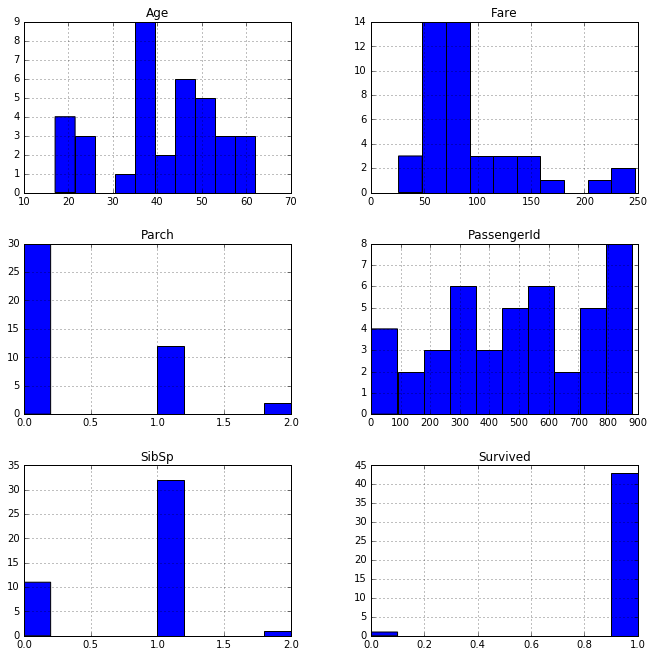

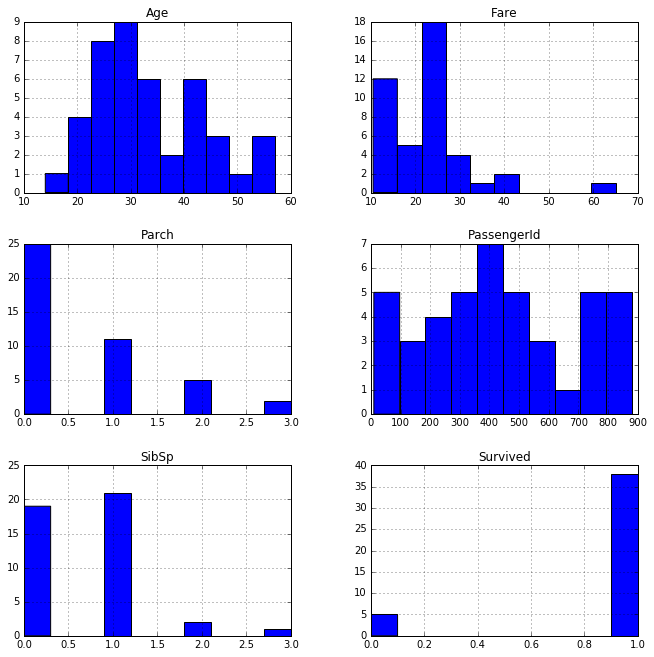

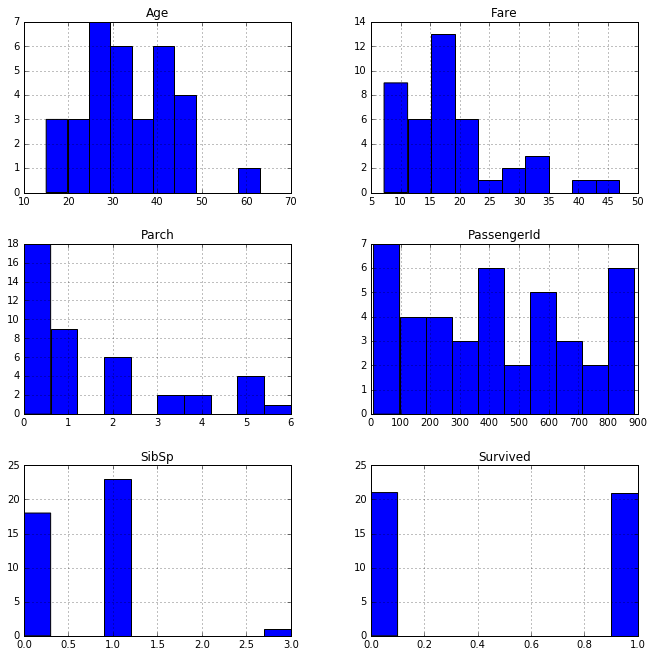

In [191]:
married_women.groupby("Pclass").hist(figsize=(11,11))

In [43]:
unmarried_women.groupby("Pclass").describe()

Age        Fare       Parch  PassengerId       SibSp  \
Pclass                                                                     
1      count  45.000000   46.000000   46.000000    46.000000   46.000000   
       mean   30.000000  124.402715    0.586957   426.391304    0.391304   
       std    12.852308   90.384256    0.858321   224.756508    0.773973   
       min     2.000000   26.283300    0.000000    12.000000    0.000000   
       25%    21.000000   76.708350    0.000000   279.750000    0.000000   
       50%    30.000000   91.750000    0.000000   349.500000    0.000000   
       75%    36.000000  151.550000    1.000000   574.750000    0.750000   
       max    63.000000  512.329200    2.000000   888.000000    3.000000   
2      count  32.000000   34.000000   34.000000    34.000000   34.000000   
       mean   22.390625   20.393750    0.558824   438.352941    0.264706   
       std    13.374708   11.900908    0.785905   223.767992    0.511019   
       min     2.000000   10.500000    0.000000    44.000000    0.000000   
       25%    11.750000   13.000000    0.000000   308.750000    0.000000   
       50%    24.000000   13.000000    0.000000   437.500000    0.000000   
       75%    30.625000   26.187500    1.000000   611.250000    0.000000   
       max    50.000000   65.000000    2.000000   867.000000    2.000000   
3      count  69.000000  102.000000  102.000000   102.000000  102.000000   
       mean   16.123188   15.248043    0.529412   391.166667    1.009804   
       std     9.697315   12.649688    0.792363   263.663680    1.765988   
       min     0.750000    6.750000    0.000000     3.000000    0.000000   
       25%     9.000000    7.750000    0.000000   161.000000    0.000000   
       50%    18.000000    8.756250    0.000000   372.000000    0.000000   
       75%    22.000000   19.258300    1.000000   629.500000    1.000000   
       max    45.000000   69.550000    2.000000   889.000000    8.000000   

                Survived  
Pclass                    
1      count   46.000000  
       mean     0.956522  
       std      0.206185  
       min      0.000000  
       25%      1.000000  
       50%      1.000000  
       75%      1.000000  
       max      1.000000  
2      count   34.000000  
       mean     0.941176  
       std      0.238833  
       min      0.000000  
       25%      1.000000  
       50%      1.000000  
       75%      1.000000  
       max      1.000000  
3      count  102.000000  
       mean     0.500000  
       std      0.502469  
       min      0.000000  
       25%      0.000000  
       50%      0.500000  
       75%      1.000000  
       max      1.000000

In [44]:
test1.groupby("Age").describe()

Fare     Parch  PassengerId  Pclass  Sex     SibSp  Survived
Age                                                                           
0.42  count   1.000000  1.000000     1.000000     1.0  1.0  1.000000       1.0
      mean    8.516700  1.000000   804.000000     3.0  0.0  0.000000       1.0
      std          NaN       NaN          NaN     NaN  NaN       NaN       NaN
      min     8.516700  1.000000   804.000000     3.0  0.0  0.000000       1.0
      25%     8.516700  1.000000   804.000000     3.0  0.0  0.000000       1.0
      50%     8.516700  1.000000   804.000000     3.0  0.0  0.000000       1.0
      75%     8.516700  1.000000   804.000000     3.0  0.0  0.000000       1.0
      max     8.516700  1.000000   804.000000     3.0  0.0  0.000000       1.0
0.67  count   1.000000  1.000000     1.000000     1.0  1.0  1.000000       1.0
      mean   14.500000  1.000000   756.000000     2.0  0.0  1.000000       1.0
      std          NaN       NaN          NaN     NaN  NaN       NaN       NaN
      min    14.500000  1.000000   756.000000     2.0  0.0  1.000000       1.0
      25%    14.500000  1.000000   756.000000     2.0  0.0  1.000000       1.0
      50%    14.500000  1.000000   756.000000     2.0  0.0  1.000000       1.0
      75%    14.500000  1.000000   756.000000     2.0  0.0  1.000000       1.0
      max    14.500000  1.000000   756.000000     2.0  0.0  1.000000       1.0
0.75  count   2.000000  2.000000     2.000000     2.0  2.0  2.000000       2.0
      mean   19.258300  1.000000   557.500000     3.0  1.0  2.000000       1.0
      std     0.000000  0.000000   123.743687     0.0  0.0  0.000000       0.0
      min    19.258300  1.000000   470.000000     3.0  1.0  2.000000       1.0
      25%    19.258300  1.000000   513.750000     3.0  1.0  2.000000       1.0
      50%    19.258300  1.000000   557.500000     3.0  1.0  2.000000       1.0
      75%    19.258300  1.000000   601.250000     3.0  1.0  2.000000       1.0
      max    19.258300  1.000000   645.000000     3.0  1.0  2.000000       1.0
0.83  count   2.000000  2.000000     2.000000     2.0  2.0  2.000000       2.0
      mean   23.875000  1.500000   455.500000     2.0  0.0  0.500000       1.0
      std     7.247845  0.707107   532.451406     0.0  0.0  0.707107       0.0
      min    18.750000  1.000000    79.000000     2.0  0.0  0.000000       1.0
      25%    21.312500  1.250000   267.250000     2.0  0.0  0.250000       1.0
      50%    23.875000  1.500000   455.500000     2.0  0.0  0.500000       1.0
...                ...       ...          ...     ...  ...       ...       ...
70.50 std          NaN       NaN          NaN     NaN  NaN       NaN       NaN
      min     7.750000  0.000000   117.000000     3.0  0.0  0.000000       0.0
      25%     7.750000  0.000000   117.000000     3.0  0.0  0.000000       0.0
      50%     7.750000  0.000000   117.000000     3.0  0.0  0.000000       0.0
      75%     7.750000  0.000000   117.000000     3.0  0.0  0.000000       0.0
      max     7.750000  0.000000   117.000000     3.0  0.0  0.000000       0.0
71.00 count   2.000000  2.000000     2.000000     2.0  2.0  2.000000       2.0
      mean   42.079200  0.000000   295.500000     1.0  0.0  0.000000       0.0
      std    10.500536  0.000000   280.721392     0.0  0.0  0.000000       0.0
      min    34.654200  0.000000    97.000000     1.0  0.0  0.000000       0.0
      25%    38.366700  0.000000   196.250000     1.0  0.0  0.000000       0.0
      50%    42.079200  0.000000   295.500000     1.0  0.0  0.000000       0.0
      75%    45.791700  0.000000   394.750000     1.0  0.0  0.000000       0.0
      max    49.504200  0.000000   494.000000     1.0  0.0  0.000000       0.0
74.00 count   1.000000  1.000000     1.000000     1.0  1.0  1.000000       1.0
      mean    7.775000  0.000000   852.000000     3.0  0.0  0.000000       0.0
      std          NaN       NaN          NaN     NaN  NaN       NaN       NaN
      min     7.775000  0.000000   852.000000     3.0  0.0  0.000000

In [45]:
oldest_survivor = df[df["Age"] == 80]

In [46]:
oldest_survivor

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0,A23,S


Well, this is a piece of bad data.  Mr. Barkworth was only 47 when he sailed on the Titanic.  (He went overboard and eventually made his way to a lifeboat.  See http://www.encyclopedia-titanica.org/titanic-survivor/algernon-barkworth.html.)

In [47]:
all = test1
all[all.index == 630]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",0,80.0,0,0,27042,30.0,A23,S


In [48]:
bad_age = all[all.index == 630]


In [49]:
all.loc[630,"Age"] = 47.0

In [50]:
all[all.index == 630]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",0,47.0,0,0,27042,30.0,A23,S


In [51]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [52]:
all.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.034864,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.081679,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.367260,0.083081,0.018443,-0.549500
Sex,-0.042939,0.543351,-0.131900,1.000000,-0.091518,0.114631,0.245489,0.182333
Age,0.034864,-0.081679,-0.367260,-0.091518,1.000000,-0.308790,-0.188915,0.097072
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308790,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.188915,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.097072,0.159651,0.216225,1.000000


In [53]:
married_women.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.038019,-0.119028,0.144106,-0.000046,0.155432,0.120881
Survived,0.038019,1.000000,-0.476615,0.002714,0.013362,-0.336761,0.218975
Pclass,-0.119028,-0.476615,1.000000,-0.247490,-0.105555,0.351844,-0.664784
Age,0.144106,0.002714,-0.247490,1.000000,-0.126680,0.062209,0.197109
SibSp,-0.000046,0.013362,-0.105555,-0.126680,1.000000,-0.092343,0.095574
Parch,0.155432,-0.336761,0.351844,0.062209,-0.092343,1.000000,-0.034307
Fare,0.120881,0.218975,-0.664784,0.197109,0.095574,-0.034307,1.000000


In [54]:
unmarried_women_over_15.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.031963,-0.086121,-0.085809,-0.171587,0.022246,0.009553
Survived,-0.031963,1.000000,-0.561796,0.119475,-0.080209,0.115709,0.314063
Pclass,-0.086121,-0.561796,1.000000,-0.370019,0.021407,-0.220974,-0.622130
Age,-0.085809,0.119475,-0.370019,1.000000,-0.159432,-0.262354,0.190805
SibSp,-0.171587,-0.080209,0.021407,-0.159432,1.000000,0.545575,0.234454
Parch,0.022246,0.115709,-0.220974,-0.262354,0.545575,1.000000,0.263994
Fare,0.009553,0.314063,-0.622130,0.190805,0.234454,0.263994,1.000000


In [55]:
married_women.groupby("Pclass").corr()

Age      Fare     Parch  PassengerId     SibSp  \
Pclass                                                                    
1      Age          1.000000 -0.084978  0.096605     0.164065 -0.238010   
       Fare        -0.084978  1.000000  0.425630    -0.000764 -0.105971   
       Parch        0.096605  0.425630  1.000000     0.225078 -0.201242   
       PassengerId  0.164065 -0.000764  0.225078     1.000000 -0.040537   
       SibSp       -0.238010 -0.105971 -0.201242    -0.040537  1.000000   
       Survived     0.211410 -0.184612 -0.439548    -0.000433 -0.073713   
2      Age          1.000000 -0.021100  0.083396     0.237594 -0.220817   
       Fare        -0.021100  1.000000  0.403952     0.228465  0.426921   
       Parch        0.083396  0.403952  1.000000     0.209249  0.215289   
       PassengerId  0.237594  0.228465  0.209249     1.000000  0.227331   
       SibSp       -0.220817  0.426921  0.215289     0.227331  1.000000   
       Survived    -0.087541  0.149375  0.179799     0.005962  0.027372   
3      Age          1.000000  0.334812  0.268492    -0.109038 -0.016087   
       Fare         0.334812  1.000000  0.826212     0.240867  0.163236   
       Parch        0.268492  0.826212  1.000000     0.242668 -0.192393   
       PassengerId -0.109038  0.240867  0.242668     1.000000 -0.249557   
       SibSp       -0.016087  0.163236 -0.192393    -0.249557  1.000000   
       Survived    -0.294034 -0.333033 -0.283758    -0.035734 -0.077382   

                    Survived  
Pclass                        
1      Age          0.211410  
       Fare        -0.184612  
       Parch       -0.439548  
       PassengerId -0.000433  
       SibSp       -0.073713  
       Survived     1.000000  
2      Age         -0.087541  
       Fare         0.149375  
       Parch        0.179799  
       PassengerId  0.005962  
       SibSp        0.027372  
       Survived     1.000000  
3      Age         -0.294034  
       Fare        -0.333033  
       Parch       -0.283758  
       PassengerId -0.035734  
       SibSp       -0.077382  
       Survived     1.000000

In [56]:
married_women.groupby("Pclass").describe()


Age        Fare      Parch  PassengerId      SibSp  \
Pclass                                                                   
1      count  36.000000   44.000000  44.000000    44.000000  44.000000   
       mean   40.611111   90.960702   0.363636   498.250000   0.772727   
       std    12.658769   50.628485   0.574291   267.173589   0.475621   
       min    17.000000   25.929200   0.000000     2.000000   0.000000   
       25%    35.000000   54.525000   0.000000   298.000000   0.750000   
       50%    41.500000   78.733350   0.000000   519.000000   1.000000   
       75%    50.250000  109.395825   1.000000   764.500000   1.000000   
       max    62.000000  247.520800   2.000000   880.000000   2.000000   
2      count  43.000000   43.000000  43.000000    43.000000  43.000000   
       mean   33.116279   23.310272   0.627907   440.837209   0.651163   
       std    10.413383    9.853717   0.873506   260.837838   0.686042   
       min    14.000000   10.500000   0.000000    10.000000   0.000000   
       25%    24.500000   15.125000   0.000000   254.000000   0.000000   
       50%    31.000000   26.000000   0.000000   433.000000   1.000000   
       75%    40.500000   26.000000   1.000000   640.000000   1.000000   
       max    57.000000   65.000000   3.000000   881.000000   3.000000   
3      count  33.000000   42.000000  42.000000    42.000000  42.000000   
       mean   33.515152   18.233529   1.452381   420.523810   0.619048   
       std    10.031579    8.718123   1.783425   277.843195   0.622833   
       min    15.000000    7.225000   0.000000     9.000000   0.000000   
       25%    27.000000   14.413550   0.000000   172.750000   0.000000   
       50%    31.000000   15.975000   1.000000   405.500000   1.000000   
       75%    40.000000   20.456250   2.000000   633.750000   1.000000   
       max    63.000000   46.900000   6.000000   886.000000   3.000000   

               Survived  
Pclass                   
1      count  44.000000  
       mean    0.977273  
       std     0.150756  
       min     0.000000  
       25%     1.000000  
       50%     1.000000  
       75%     1.000000  
       max     1.000000  
2      count  43.000000  
       mean    0.883721  
       std     0.324353  
       min     0.000000  
       25%     1.000000  
       50%     1.000000  
       75%     1.000000  
       max     1.000000  
3      count  42.000000  
       mean    0.500000  
       std     0.506061  
       min     0.000000  
       25%     0.000000  
       50%     0.500000  
       75%     1.000000  
       max     1.000000

In [57]:
children = all[all["Age"] < 15]

In [58]:
children.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.090493,-0.031728,-0.097111,-0.034271,-0.086433,0.020985,-0.017807
Survived,0.090493,1.000000,-0.443057,0.077850,-0.233099,-0.663832,-0.136593,-0.053537
Pclass,-0.031728,-0.443057,1.000000,0.021315,0.091865,0.387525,-0.186995,-0.681269
Sex,-0.097111,0.077850,0.021315,1.000000,0.138358,-0.265982,-0.059143,-0.124083
Age,-0.034271,-0.233099,0.091865,0.138358,1.000000,0.045571,-0.198183,0.013355
SibSp,-0.086433,-0.663832,0.387525,-0.265982,0.045571,1.000000,0.282540,0.109287
Parch,0.020985,-0.136593,-0.186995,-0.059143,-0.198183,0.282540,1.000000,0.430846
Fare,-0.017807,-0.053537,-0.681269,-0.124083,0.013355,0.109287,0.430846,1.000000


In [59]:
children.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,423.717949,0.576923,2.628205,0.500000,5.816282,1.820513,1.320513,31.704435
std,282.756189,0.497245,0.605365,0.503236,4.320822,1.649428,0.654526,27.353590
min,8.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,7.229200
25%,172.250000,0.000000,2.000000,0.000000,2.000000,0.250000,1.000000,18.750000
50%,428.000000,1.000000,3.000000,0.500000,4.000000,1.000000,1.000000,27.000000
75%,690.750000,1.000000,3.000000,1.000000,9.000000,3.750000,2.000000,32.596875
max,870.000000,1.000000,3.000000,1.000000,14.500000,5.000000,2.000000,151.550000


In [60]:
children.groupby("Pclass").describe()

Age        Fare      Parch  PassengerId        Sex  \
Pclass                                                                   
1      count   5.000000    5.000000   5.000000     5.000000   5.000000   
       mean    6.384000  124.991660   2.000000   457.800000   0.400000   
       std     5.789411   28.814106   0.000000   205.156526   0.547723   
       min     0.920000   81.858300   2.000000   298.000000   0.000000   
       25%     2.000000  120.000000   2.000000   306.000000   0.000000   
       50%     4.000000  120.000000   2.000000   436.000000   0.000000   
       75%    11.000000  151.550000   2.000000   446.000000   1.000000   
       max    14.000000  151.550000   2.000000   803.000000   1.000000   
2      count  19.000000   19.000000  19.000000    19.000000  19.000000   
       mean    4.543684   28.323905   1.263158   427.789474   0.526316   
       std     3.955098    7.750054   0.561951   282.201579   0.512989   
       min     0.670000   14.500000   0.000000    10.000000   0.000000   
       25%     1.500000   24.500000   1.000000   189.000000   0.000000   
       50%     3.000000   26.250000   1.000000   447.000000   1.000000   
       75%     6.500000   34.875000   2.000000   670.000000   1.000000   
       max    14.000000   41.579200   2.000000   832.000000   1.000000   
3      count  54.000000   54.000000  54.000000    54.000000  54.000000   
       mean    6.211481   24.256174   1.277778   419.129630   0.500000   
       std     4.302470   11.061837   0.684510   292.907871   0.504695   
       min     0.420000    7.229200   0.000000     8.000000   0.000000   
       25%     2.000000   15.369775   1.000000   165.250000   0.000000   
       50%     5.000000   21.550000   1.000000   403.500000   0.500000   
       75%     9.000000   31.275000   2.000000   690.750000   1.000000   
       max    14.500000   46.900000   2.000000   870.000000   1.000000   

                  SibSp   Survived  
Pclass                              
1      count   5.000000   5.000000  
       mean    0.800000   0.800000  
       std     0.447214   0.447214  
       min     0.000000   0.000000  
       25%     1.000000   1.000000  
       50%     1.000000   1.000000  
       75%     1.000000   1.000000  
       max     1.000000   1.000000  
2      count  19.000000  19.000000  
       mean    0.789474   1.000000  
       std     0.630604   0.000000  
       min     0.000000   1.000000  
       25%     0.000000   1.000000  
       50%     1.000000   1.000000  
       75%     1.000000   1.000000  
       max     2.000000   1.000000  
3      count  54.000000  54.000000  
       mean    2.277778   0.407407  
       std     1.763537   0.495966  
       min     0.000000   0.000000  
       25%     1.000000   0.000000  
       50%     2.500000   0.000000  
       75%     4.000000   1.000000  
       max     5.000000   1.000000

OK, this is the saddest thing, I think.  Children had a very good survival rate in the first two classes of service. Of the six in first class, only one died, the unfortunate Allison toddler--whose mother refused to board a lifeboat.  Of the 19 in second class, all survived.  But most of the children on the Titanic (54) were in third class cabins.  Only 40% (roughly) of these children survived. Having siblings was negatively correlated with survival, and married women travelling with children were also less likely to survive.  

In the struggle to get on the life-boats in third class, having a family of small children was negatively corrolated with survival.

In [61]:
children.groupby("Pclass").corr()

Age      Fare     Parch  PassengerId       Sex  \
Pclass                                                                    
1      Age          1.000000 -0.329365       NaN     0.628411  0.254810   
       Fare        -0.329365  1.000000       NaN    -0.396729  0.341631   
       Parch             NaN       NaN       NaN          NaN       NaN   
       PassengerId  0.628411 -0.396729       NaN     1.000000 -0.404027   
       Sex          0.254810  0.341631       NaN    -0.404027  1.000000   
       SibSp        0.230196  0.836822       NaN     0.032153  0.408248   
       Survived     0.423313 -0.515253       NaN     0.435428 -0.612372   
2      Age          1.000000 -0.017893 -0.297164    -0.242226  0.563056   
       Fare        -0.017893  1.000000  0.205926    -0.253034  0.128013   
       Parch       -0.297164  0.205926  1.000000    -0.127850  0.071001   
       PassengerId -0.242226 -0.253034 -0.127850     1.000000 -0.123530   
       Sex          0.563056  0.128013  0.071001    -0.123530  1.000000   
       SibSp       -0.281893  0.230663 -0.462069    -0.104533 -0.153659   
       Survived          NaN       NaN       NaN          NaN       NaN   
3      Age          1.000000  0.064856 -0.215724    -0.018618  0.002520   
       Fare         0.064856  1.000000  0.598045    -0.050916 -0.384981   
       Parch       -0.215724  0.598045  1.000000     0.051010 -0.081923   
       PassengerId -0.018618 -0.050916  0.051010     1.000000 -0.069624   
       Sex          0.002520 -0.384981 -0.081923    -0.069624  1.000000   
       SibSp        0.008673  0.880086  0.466296    -0.088173 -0.349780   
       Survived    -0.262898 -0.600361 -0.228482     0.091844  0.150756   

                       SibSp  Survived  
Pclass                                  
1      Age          0.230196  0.423313  
       Fare         0.836822 -0.515253  
       Parch             NaN       NaN  
       PassengerId  0.032153  0.435428  
       Sex          0.408248 -0.612372  
       SibSp        1.000000 -0.250000  
       Survived    -0.250000  1.000000  
2      Age         -0.281893       NaN  
       Fare         0.230663       NaN  
       Parch       -0.462069       NaN  
       PassengerId -0.104533       NaN  
       Sex         -0.153659       NaN  
       SibSp        1.000000       NaN  
       Survived          NaN       NaN  
3      Age          0.008673 -0.262898  
       Fare         0.880086 -0.600361  
       Parch        0.466296 -0.228482  
       PassengerId -0.088173  0.091844  
       Sex         -0.349780  0.150756  
       SibSp        1.000000 -0.606410  
       Survived    -0.606410  1.000000

In [62]:
all.groupby("Pclass").describe()

Age        Fare       Parch  PassengerId         Sex  \
Pclass                                                                      
1      count  186.000000  216.000000  216.000000   216.000000  216.000000   
       mean    38.056022   84.154687    0.356481   461.597222    0.435185   
       std     14.494098   78.380373    0.693997   246.737616    0.496933   
       min      0.920000    0.000000    0.000000     2.000000    0.000000   
       25%     27.000000   30.923950    0.000000   270.750000    0.000000   
       50%     37.000000   60.287500    0.000000   472.000000    0.000000   
       75%     49.000000   93.500000    0.000000   670.500000    1.000000   
       max     71.000000  512.329200    4.000000   890.000000    1.000000   
2      count  173.000000  184.000000  184.000000   184.000000  184.000000   
       mean    29.877630   20.662183    0.380435   445.956522    0.413043   
       std     14.001077   13.417399    0.690963   250.852161    0.493724   
       min      0.670000    0.000000    0.000000    10.000000    0.000000   
       25%     23.000000   13.000000    0.000000   234.500000    0.000000   
       50%     29.000000   14.250000    0.000000   435.500000    0.000000   
       75%     36.000000   26.000000    1.000000   668.000000    1.000000   
       max     70.000000   73.500000    3.000000   887.000000    1.000000   
3      count  355.000000  491.000000  491.000000   491.000000  491.000000   
       mean    25.140620   13.675550    0.393075   439.154786    0.293279   
       std     12.495398   11.778142    0.888861   264.441453    0.455730   
       min      0.420000    0.000000    0.000000     1.000000    0.000000   
       25%     18.000000    7.750000    0.000000   200.000000    0.000000   
       50%     24.000000    8.050000    0.000000   432.000000    0.000000   
       75%     32.000000   15.500000    0.000000   666.500000    1.000000   
       max     74.000000   69.550000    6.000000   891.000000    1.000000   

                   SibSp    Survived  
Pclass                                
1      count  216.000000  216.000000  
       mean     0.416667    0.629630  
       std      0.611898    0.484026  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    1.000000  
       75%      1.000000    1.000000  
       max      3.000000    1.000000  
2      count  184.000000  184.000000  
       mean     0.402174    0.472826  
       std      0.601633    0.500623  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      1.000000    1.000000  
       max      3.000000    1.000000  
3      count  491.000000  491.000000  
       mean     0.615071    0.242363  
       std      1.374883    0.428949  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      1.000000    0.000000  
       max      8.000000    1.000000

Only 24 percent of the third class passengers survived, though, so at least the children had a bit of an advantage.


In [63]:
women.groupby("Pclass").describe()

Age        Fare       Parch  PassengerId       SibSp  \
Pclass                                                                      
1      count   85.000000   94.000000   94.000000    94.000000   94.000000   
       mean    34.611765  106.125798    0.457447   469.212766    0.553191   
       std     13.612052   74.259988    0.728305   247.476723    0.665865   
       min      2.000000   25.929200    0.000000     2.000000    0.000000   
       25%     23.000000   57.244800    0.000000   293.500000    0.000000   
       50%     35.000000   82.664550    0.000000   447.000000    0.000000   
       75%     44.000000  134.500000    1.000000   698.250000    1.000000   
       max     63.000000  512.329200    2.000000   888.000000    3.000000   
2      count   74.000000   76.000000   76.000000    76.000000   76.000000   
       mean    28.722973   21.970121    0.605263   443.105263    0.486842   
       std     12.872702   10.891796    0.833930   243.627288    0.642774   
       min      2.000000   10.500000    0.000000    10.000000    0.000000   
       25%     22.250000   13.000000    0.000000   269.750000    0.000000   
       50%     28.000000   22.000000    0.000000   439.500000    0.000000   
       75%     36.000000   26.062500    1.000000   616.750000    1.000000   
       max     57.000000   65.000000    3.000000   881.000000    3.000000   
3      count  102.000000  144.000000  144.000000   144.000000  144.000000   
       mean    21.750000   16.118810    0.798611   399.729167    0.895833   
       std     12.729964   11.690314    1.237976   267.232416    1.531573   
       min      0.750000    6.750000    0.000000     3.000000    0.000000   
       25%     14.125000    7.854200    0.000000   165.250000    0.000000   
       50%     21.500000   12.475000    0.000000   376.000000    0.000000   
       75%     29.750000   20.221875    1.000000   636.000000    1.000000   
       max     63.000000   69.550000    6.000000   889.000000    8.000000   

                Survived  
Pclass                    
1      count   94.000000  
       mean     0.968085  
       std      0.176716  
       min      0.000000  
       25%      1.000000  
       50%      1.000000  
       75%      1.000000  
       max      1.000000  
2      count   76.000000  
       mean     0.921053  
       std      0.271448  
       min      0.000000  
       25%      1.000000  
       50%      1.000000  
       75%      1.000000  
       max      1.000000  
3      count  144.000000  
       mean     0.500000  
       std      0.501745  
       min      0.000000  
       25%      0.000000  
       50%      0.500000  
       75%      1.000000  
       max      1.000000

In [64]:
women.groupby('Pclass').corr()

Age      Fare     Parch  PassengerId     SibSp  \
Pclass                                                                    
1      Age          1.000000 -0.138710 -0.297008     0.018767 -0.036071   
       Fare        -0.138710  1.000000  0.258097    -0.073777  0.199927   
       Parch       -0.297008  0.258097  1.000000     0.061678  0.248617   
       PassengerId  0.018767 -0.073777  0.061678     1.000000 -0.059449   
       SibSp       -0.036071  0.199927  0.248617    -0.059449  1.000000   
       Survived     0.126440 -0.011008 -0.219532     0.106373 -0.031108   
2      Age          1.000000 -0.194629 -0.245075     0.127111 -0.170808   
       Fare        -0.194629  1.000000  0.525438     0.179075  0.506965   
       Parch       -0.245075  0.525438  1.000000     0.108033  0.288673   
       PassengerId  0.127111  0.179075  0.108033     1.000000  0.199587   
       SibSp       -0.170808  0.506965  0.288673     0.199587  1.000000   
       Survived    -0.169067  0.100661  0.155002     0.023716 -0.006033   
3      Age          1.000000  0.004665  0.150858     0.012363 -0.327094   
       Fare         0.004665  1.000000  0.653725     0.126449  0.808737   
       Parch        0.150858  0.653725  1.000000     0.170798  0.291291   
       PassengerId  0.012363  0.126449  0.170798     1.000000  0.004322   
       SibSp       -0.327094  0.808737  0.291291     0.004322  1.000000   
       Survived    -0.176617 -0.313682 -0.242051    -0.152630 -0.259351   

                    Survived  
Pclass                        
1      Age          0.126440  
       Fare        -0.011008  
       Parch       -0.219532  
       PassengerId  0.106373  
       SibSp       -0.031108  
       Survived     1.000000  
2      Age         -0.169067  
       Fare         0.100661  
       Parch        0.155002  
       PassengerId  0.023716  
       SibSp       -0.006033  
       Survived     1.000000  
3      Age         -0.176617  
       Fare        -0.313682  
       Parch       -0.242051  
       PassengerId -0.152630  
       SibSp       -0.259351  
       Survived     1.000000

In [65]:
married_women.groupby("Pclass").corr()

Age      Fare     Parch  PassengerId     SibSp  \
Pclass                                                                    
1      Age          1.000000 -0.084978  0.096605     0.164065 -0.238010   
       Fare        -0.084978  1.000000  0.425630    -0.000764 -0.105971   
       Parch        0.096605  0.425630  1.000000     0.225078 -0.201242   
       PassengerId  0.164065 -0.000764  0.225078     1.000000 -0.040537   
       SibSp       -0.238010 -0.105971 -0.201242    -0.040537  1.000000   
       Survived     0.211410 -0.184612 -0.439548    -0.000433 -0.073713   
2      Age          1.000000 -0.021100  0.083396     0.237594 -0.220817   
       Fare        -0.021100  1.000000  0.403952     0.228465  0.426921   
       Parch        0.083396  0.403952  1.000000     0.209249  0.215289   
       PassengerId  0.237594  0.228465  0.209249     1.000000  0.227331   
       SibSp       -0.220817  0.426921  0.215289     0.227331  1.000000   
       Survived    -0.087541  0.149375  0.179799     0.005962  0.027372   
3      Age          1.000000  0.334812  0.268492    -0.109038 -0.016087   
       Fare         0.334812  1.000000  0.826212     0.240867  0.163236   
       Parch        0.268492  0.826212  1.000000     0.242668 -0.192393   
       PassengerId -0.109038  0.240867  0.242668     1.000000 -0.249557   
       SibSp       -0.016087  0.163236 -0.192393    -0.249557  1.000000   
       Survived    -0.294034 -0.333033 -0.283758    -0.035734 -0.077382   

                    Survived  
Pclass                        
1      Age          0.211410  
       Fare        -0.184612  
       Parch       -0.439548  
       PassengerId -0.000433  
       SibSp       -0.073713  
       Survived     1.000000  
2      Age         -0.087541  
       Fare         0.149375  
       Parch        0.179799  
       PassengerId  0.005962  
       SibSp        0.027372  
       Survived     1.000000  
3      Age         -0.294034  
       Fare        -0.333033  
       Parch       -0.283758  
       PassengerId -0.035734  
       SibSp       -0.077382  
       Survived     1.000000

Of the 144 women in the third-class sample, only half made it.

In [66]:
married_women.groupby('Pclass').describe()

Age        Fare      Parch  PassengerId      SibSp  \
Pclass                                                                   
1      count  36.000000   44.000000  44.000000    44.000000  44.000000   
       mean   40.611111   90.960702   0.363636   498.250000   0.772727   
       std    12.658769   50.628485   0.574291   267.173589   0.475621   
       min    17.000000   25.929200   0.000000     2.000000   0.000000   
       25%    35.000000   54.525000   0.000000   298.000000   0.750000   
       50%    41.500000   78.733350   0.000000   519.000000   1.000000   
       75%    50.250000  109.395825   1.000000   764.500000   1.000000   
       max    62.000000  247.520800   2.000000   880.000000   2.000000   
2      count  43.000000   43.000000  43.000000    43.000000  43.000000   
       mean   33.116279   23.310272   0.627907   440.837209   0.651163   
       std    10.413383    9.853717   0.873506   260.837838   0.686042   
       min    14.000000   10.500000   0.000000    10.000000   0.000000   
       25%    24.500000   15.125000   0.000000   254.000000   0.000000   
       50%    31.000000   26.000000   0.000000   433.000000   1.000000   
       75%    40.500000   26.000000   1.000000   640.000000   1.000000   
       max    57.000000   65.000000   3.000000   881.000000   3.000000   
3      count  33.000000   42.000000  42.000000    42.000000  42.000000   
       mean   33.515152   18.233529   1.452381   420.523810   0.619048   
       std    10.031579    8.718123   1.783425   277.843195   0.622833   
       min    15.000000    7.225000   0.000000     9.000000   0.000000   
       25%    27.000000   14.413550   0.000000   172.750000   0.000000   
       50%    31.000000   15.975000   1.000000   405.500000   1.000000   
       75%    40.000000   20.456250   2.000000   633.750000   1.000000   
       max    63.000000   46.900000   6.000000   886.000000   3.000000   

               Survived  
Pclass                   
1      count  44.000000  
       mean    0.977273  
       std     0.150756  
       min     0.000000  
       25%     1.000000  
       50%     1.000000  
       75%     1.000000  
       max     1.000000  
2      count  43.000000  
       mean    0.883721  
       std     0.324353  
       min     0.000000  
       25%     1.000000  
       50%     1.000000  
       75%     1.000000  
       max     1.000000  
3      count  42.000000  
       mean    0.500000  
       std     0.506061  
       min     0.000000  
       25%     0.000000  
       50%     0.500000  
       75%     1.000000  
       max     1.000000

In [67]:
third_class_children = children[children['Pclass'] == 3.0]

In [68]:
third_class_children.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",1,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",0,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",1,8.0,3,1,349909,21.0750,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",1,14.0,1,0,2651,11.2417,NaN,C
50,51,0,3,"Panula, Master. Juha Niilo",0,7.0,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",0,11.0,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",0,4.0,3,2,347088,27.9000,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",1,14.5,1,0,2665,14.4542,NaN,C


In [69]:
third_class_children

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.00,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.00,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",1,14.00,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",0,2.00,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",1,8.00,3,1,349909,21.0750,NaN,S
39,40,1,3,"Nicola-Yarred, Miss. Jamila",1,14.00,1,0,2651,11.2417,NaN,C
50,51,0,3,"Panula, Master. Juha Niilo",0,7.00,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",0,11.00,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",0,4.00,3,2,347088,27.9000,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",1,14.50,1,0,2665,14.4542,NaN,C


In [70]:
third_class_children.groupby("Sex").describe()

Age       Fare      Parch  PassengerId  Pclass      SibSp  \
Sex                                                                          
0   count  27.000000  27.000000  27.000000    27.000000    27.0  27.000000   
    mean    6.200741  28.475156   1.333333   439.333333     3.0   2.888889   
    std     4.201869  11.978339   0.620174   315.477904     0.0   1.783112   
    min     0.420000   8.516700   0.000000     8.000000     3.0   0.000000   
    25%     2.500000  19.656250   1.000000   165.500000     3.0   1.000000   
    50%     6.000000  29.125000   1.000000   387.000000     3.0   4.000000   
    75%     9.000000  39.687500   2.000000   770.000000     3.0   4.000000   
    max    14.000000  46.900000   2.000000   870.000000     3.0   5.000000   
1   count  27.000000  27.000000  27.000000    27.000000    27.0  27.000000   
    mean    6.222222  20.037193   1.222222   398.925926     3.0   1.666667   
    std     4.480907   8.305742   0.751068   272.975756     0.0   1.544220   
    min     0.750000   7.229200   0.000000    11.000000     3.0   0.000000   
    25%     2.000000  12.945850   1.000000   160.500000     3.0   0.000000   
    50%     5.000000  19.258300   1.000000   420.000000     3.0   1.000000   
    75%     9.000000  27.900000   2.000000   639.000000     3.0   3.000000   
    max    14.500000  34.375000   2.000000   853.000000     3.0   4.000000   

            Survived  
Sex                   
0   count  27.000000  
    mean    0.333333  
    std     0.480384  
    min     0.000000  
    25%     0.000000  
    50%     0.000000  
    75%     1.000000  
    max     1.000000  
1   count  27.000000  
    mean    0.481481  
    std     0.509175  
    min     0.000000  
    25%     0.000000  
    50%     0.000000  
    75%     1.000000  
    max     1.000000

In [181]:
third_class_children.groupby('Parch').describe()

Age       Fare  PassengerId  Pclass        Sex      SibSp  \
Parch                                                                          
0     count   7.000000   7.000000     7.000000     7.0   7.000000   7.000000   
      mean   11.928571  11.897643   369.142857     3.0   0.714286   0.428571   
      std     3.296824   3.944274   371.359856     0.0   0.487950   0.534522   
      min     5.000000   7.229200    15.000000     3.0   0.000000   0.000000   
      25%    11.500000   9.547950    76.000000     3.0   0.500000   0.000000   
      50%    13.000000  11.241700   126.000000     3.0   1.000000   0.000000   
      75%    14.000000  13.464600   755.000000     3.0   1.000000   1.000000   
      max    14.500000  18.787500   781.000000     3.0   1.000000   1.000000   
1     count  25.000000  25.000000    25.000000    25.0  25.000000  25.000000   
      mean    4.356800  21.576828   425.440000     3.0   0.440000   2.120000   
      std     3.389683  10.068594   303.178864     0.0   0.506623   1.589549   
      min     0.420000   8.516700     8.000000     3.0   0.000000   0.000000   
      25%     2.000000  13.416700   172.000000     3.0   0.000000   1.000000   
      50%     4.000000  19.258300   449.000000     3.0   0.000000   2.000000   
      75%     7.000000  29.125000   692.000000     3.0   1.000000   4.000000   
      max    14.000000  39.687500   870.000000     3.0   1.000000   4.000000   
2     count  22.000000  22.000000    22.000000    22.0  22.000000  22.000000   
      mean    6.500000  31.233145   427.863636     3.0   0.500000   3.045455   
      std     3.924890   8.835530   266.681957     0.0   0.511766   1.758714   
      min     1.000000  15.741700    60.000000     3.0   0.000000   0.000000   
      25%     3.250000  27.900000   183.500000     3.0   0.000000   2.250000   
      50%     7.500000  31.275000   403.500000     3.0   0.500000   4.000000   
      75%     9.000000  31.387500   641.000000     3.0   1.000000   4.000000   
      max    14.000000  46.900000   851.000000     3.0   1.000000   5.000000   

              Survived  
Parch                   
0     count   7.000000  
      mean    0.571429  
      std     0.534522  
      min     0.000000  
      25%     0.000000  
      50%     1.000000  
      75%     1.000000  
      max     1.000000  
1     count  25.000000  
      mean    0.480000  
      std     0.509902  
      min     0.000000  
      25%     0.000000  
      50%     0.000000  
      75%     1.000000  
      max     1.000000  
2     count  22.000000  
      mean    0.272727  
      std     0.455842  
      min     0.000000  
      25%     0.000000  
      50%     0.000000  
      75%     0.750000  
      max     1.000000

This is funny.  It looks like having more parents makes your survival less likely. The 7 children listed as travelling without parents 57% survival rate.  One parent is 48% and two parents is 27%.  The difference between one and two parents is likely significant.  Since men were unlikely to get on a lifeboat, it looks as if the romantic idea of married women staying behind with their husbands is accurate. In third class!

In [182]:
third_class_children.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.091844,NaN,-0.069624,-0.018618,-0.088173,0.051010,-0.050916
Survived,0.091844,1.000000,NaN,0.150756,-0.262898,-0.606410,-0.228482,-0.600361
Pclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,-0.069624,0.150756,NaN,1.000000,0.002520,-0.349780,-0.081923,-0.384981
Age,-0.018618,-0.262898,NaN,0.002520,1.000000,0.008673,-0.215724,0.064856
SibSp,-0.088173,-0.606410,NaN,-0.349780,0.008673,1.000000,0.466296,0.880086
Parch,0.051010,-0.228482,NaN,-0.081923,-0.215724,0.466296,1.000000,0.598045
Fare,-0.050916,-0.600361,NaN,-0.384981,0.064856,0.880086,0.598045,1.000000


The largest correlations are a negative correlation with fare and a positive correlation with family size (SibSp).  These are .6 correlations and seem significant.

Let's have a look at the men.

In [72]:
men = all[all["Sex"] == 0.0]

In [73]:
men.groupby('Pclass').describe()

Age        Fare       Parch  PassengerId    Sex  \
Pclass                                                                 
1      count  101.000000  122.000000  122.000000   122.000000  122.0   
       mean    40.954653   67.226127    0.278689   455.729508    0.0   
       std     14.643582   77.548021    0.658853   247.026449    0.0   
       min      0.920000    0.000000    0.000000     7.000000    0.0   
       25%     30.000000   27.728100    0.000000   255.500000    0.0   
       50%     40.000000   41.262500    0.000000   480.500000    0.0   
       75%     50.000000   78.459375    0.000000   660.750000    0.0   
       max     71.000000  512.329200    4.000000   890.000000    0.0   
2      count   99.000000  108.000000  108.000000   108.000000  108.0   
       mean    30.740707   19.741782    0.222222   447.962963    0.0   
       std     14.793894   14.922235    0.517603   256.922546    0.0   
       min      0.670000    0.000000    0.000000    18.000000    0.0   
       25%     23.000000   12.331250    0.000000   225.750000    0.0   
       50%     30.000000   13.000000    0.000000   416.500000    0.0   
       75%     36.750000   26.000000    0.000000   677.500000    0.0   
       max     70.000000   73.500000    2.000000   887.000000    0.0   
3      count  253.000000  347.000000  347.000000   347.000000  347.0   
       mean    26.507589   12.661633    0.224784   455.515850    0.0   
       std     12.159514   11.681696    0.623404   261.921251    0.0   
       min      0.420000    0.000000    0.000000     1.000000    0.0   
       25%     20.000000    7.750000    0.000000   209.500000    0.0   
       50%     25.000000    7.925000    0.000000   466.000000    0.0   
       75%     33.000000   10.008300    0.000000   687.500000    0.0   
       max     74.000000   69.550000    5.000000   891.000000    0.0   

                   SibSp    Survived  
Pclass                                
1      count  122.000000  122.000000  
       mean     0.311475    0.368852  
       std      0.546695    0.484484  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      1.000000    1.000000  
       max      3.000000    1.000000  
2      count  108.000000  108.000000  
       mean     0.342593    0.157407  
       std      0.566380    0.365882  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      1.000000    0.000000  
       max      2.000000    1.000000  
3      count  347.000000  347.000000  
       mean     0.498559    0.135447  
       std      1.288846    0.342694  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      0.000000    0.000000  
       max      8.000000    1.000000

Men in third class had only a 13 percent survival rate.  They were at the bottom of the Titanic totem pole.



In [74]:
men.groupby('Pclass').corr()

Age      Fare     Parch  PassengerId  Sex     SibSp  \
Pclass                                                                         
1      Age          1.000000 -0.199374 -0.166751    -0.015976  NaN -0.139223   
       Fare        -0.199374  1.000000  0.450976    -0.004878  NaN  0.245073   
       Parch       -0.166751  0.450976  1.000000    -0.107895  NaN  0.238850   
       PassengerId -0.015976 -0.004878 -0.107895     1.000000  NaN -0.064423   
       Sex               NaN       NaN       NaN          NaN  NaN       NaN   
       SibSp       -0.139223  0.245073  0.238850    -0.064423  NaN  1.000000   
       Survived    -0.307421  0.073361  0.037775     0.223887  NaN  0.093096   
2      Age          1.000000 -0.196554 -0.367370    -0.016288  NaN -0.231664   
       Fare        -0.196554  1.000000  0.288426    -0.053746  NaN  0.581846   
       Parch       -0.367370  0.288426  1.000000     0.061907  NaN  0.343591   
       PassengerId -0.016288 -0.053746  0.061907     1.000000  NaN -0.007105   
       Sex               NaN       NaN       NaN          NaN  NaN       NaN   
       SibSp       -0.231664  0.581846  0.343591    -0.007105  NaN  1.000000   
       Survived    -0.422569  0.039381  0.356409    -0.054718  NaN  0.143231   
3      Age          1.000000 -0.333007 -0.302402     0.024975  NaN -0.466830   
       Fare        -0.333007  1.000000  0.574483    -0.031860  NaN  0.742452   
       Parch       -0.302402  0.574483  1.000000    -0.114791  NaN  0.633495   
       PassengerId  0.024975 -0.031860 -0.114791     1.000000  NaN -0.105069   
       Sex               NaN       NaN       NaN          NaN  NaN       NaN   
       SibSp       -0.466830  0.742452  0.633495    -0.105069  NaN  1.000000   
       Survived    -0.146657  0.099016  0.046472    -0.011922  NaN -0.048634   

                    Survived  
Pclass                        
1      Age         -0.307421  
       Fare         0.073361  
       Parch        0.037775  
       PassengerId  0.223887  
       Sex               NaN  
       SibSp        0.093096  
       Survived     1.000000  
2      Age         -0.422569  
       Fare         0.039381  
       Parch        0.356409  
       PassengerId -0.054718  
       Sex               NaN  
       SibSp        0.143231  
       Survived     1.000000  
3      Age         -0.146657  
       Fare         0.099016  
       Parch        0.046472  
       PassengerId -0.011922  
       Sex               NaN  
       SibSp       -0.048634  
       Survived     1.000000

There seems to be no correlations here except small negative correlation with age--which you would expect because of the preference for children.  Survival for third-class males seems like a random occurance.  Also, I suppose older people would be less likely to be rescued from the sea.

There is also a small positive correlation with fare.  If you take fare as a rough proxy of ability to pay, I would say the more well off were more likely to survive.  Not sure the means by which this happened and but this correlationis found mostly in the third class data. Were there different levels of third class?

Looking through the third-class passengers, I see that many of the third-class passengers who are from Syria/Lebanon boarded in Cherbourgh.  I wondered about their survival rate.

In [75]:
women.groupby('Embarked').describe()

Age        Fare       Parch  PassengerId      Pclass  \
Embarked                                                                      
C        count   61.000000   73.000000   73.000000    73.000000   73.000000   
         mean    28.344262   75.169805    0.493151   437.315068    1.726027   
         std     15.770830   83.574380    0.766001   257.119021    0.916822   
         min      0.750000    7.225000    0.000000     2.000000    1.000000   
         25%     17.000000   15.245800    0.000000   257.000000    1.000000   
         50%     24.000000   56.929200    0.000000   381.000000    1.000000   
         75%     40.000000   91.079200    1.000000   642.000000    3.000000   
         max     60.000000  512.329200    3.000000   880.000000    3.000000   
Q        count   12.000000   36.000000   36.000000    36.000000   36.000000   
         mean    24.291667   12.634958    0.222222   374.138889    2.888889   
         std      8.147667   14.298841    0.897969   244.283226    0.398410   
         min     15.000000    6.750000    0.000000    23.000000    1.000000   
         25%     17.500000    7.750000    0.000000   196.000000    3.000000   
         50%     21.500000    7.768750    0.000000   327.000000    3.000000   
         75%     30.875000   12.350000    0.000000   598.750000    3.000000   
         max     39.000000   90.000000    5.000000   886.000000    3.000000   
S        count  186.000000  203.000000  203.000000   203.000000  203.000000   
         mean    27.771505   38.740929    0.788177   438.709360    2.197044   
         std     13.690703   46.047877    1.098810   257.302783    0.796397   
         min      1.000000    7.250000    0.000000     3.000000    1.000000   
         25%     19.000000   12.562500    0.000000   232.500000    2.000000   
         50%     27.000000   24.150000    0.000000   433.000000    2.000000   
         75%     36.000000   39.200000    1.000000   641.000000    3.000000   
         max     63.000000  263.000000    6.000000   889.000000    3.000000   

                     SibSp    Survived  
Embarked                                
C        count   73.000000   73.000000  
         mean     0.547945    0.876712  
         std      0.624524    0.331042  
         min      0.000000    0.000000  
         25%      0.000000    1.000000  
         50%      0.000000    1.000000  
         75%      1.000000    1.000000  
         max      2.000000    1.000000  
Q        count   36.000000   36.000000  
         mean     0.222222    0.750000  
         std      0.484686    0.439155  
         min      0.000000    0.000000  
         25%      0.000000    0.750000  
         50%      0.000000    1.000000  
         75%      0.000000    1.000000  
         max      2.000000    1.000000  
S        count  203.000000  203.000000  
         mean     0.837438    0.689655  
         std      1.349065    0.463778  
         min      0.000000    0.000000  
         25%      0.000000    0.000000  
         50%      0.000000    1.000000  
         75%      1.000000    1.000000  
         max      8.000000    1.000000

In [77]:
third_class = all[all['Pclass']==3]

Embarked
C    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
Q    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
S    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
dtype: object

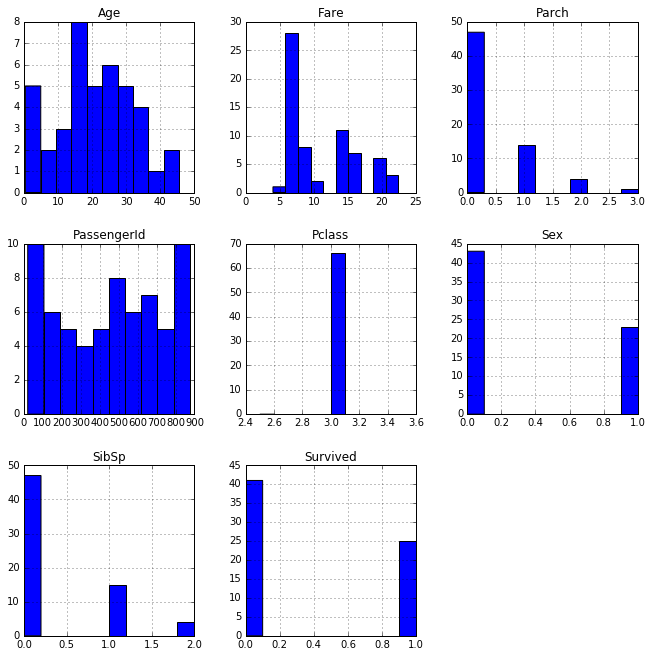

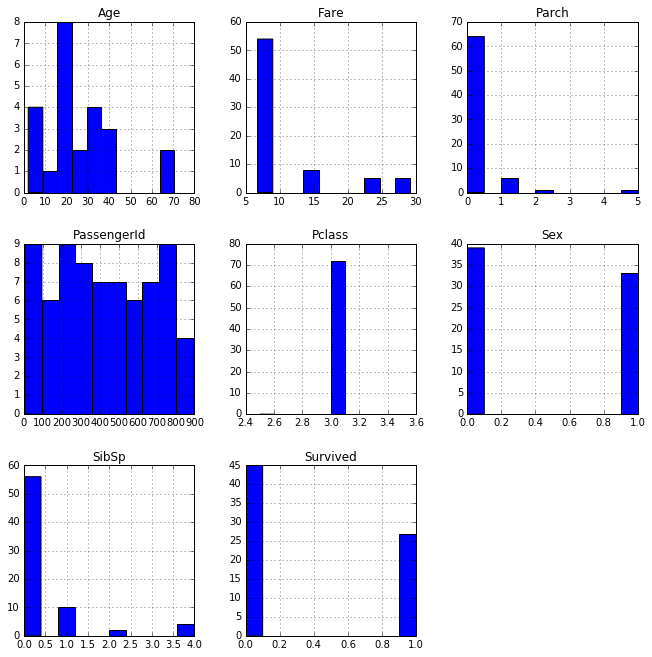

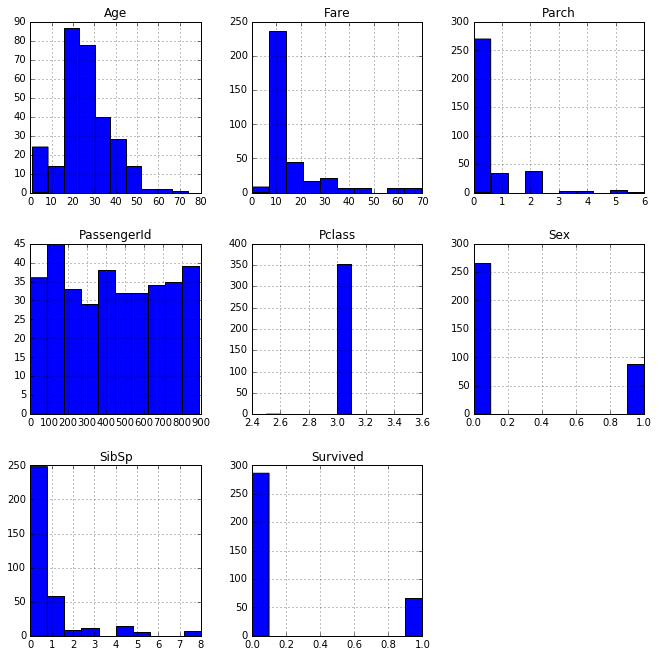

In [81]:
third_class.groupby('Embarked').hist(figsize=(11,11))

In [80]:
%matplotlib inline


In [83]:
third_class = all[all['Pclass'] == 3.0]

In [82]:
third_class.groupby('Embarked').describe()

Age        Fare       Parch  PassengerId  Pclass  \
Embarked                                                                  
C        count   41.000000   66.000000   66.000000    66.000000    66.0   
         mean    20.741951   11.214083    0.378788   451.484848     3.0   
         std     11.712367    4.871528    0.674027   277.967305     0.0   
         min      0.420000    4.012500    0.000000    20.000000     3.0   
         25%     14.000000    7.229200    0.000000   205.000000     3.0   
         50%     20.000000    7.895800    0.000000   483.000000     3.0   
         75%     29.000000   14.458300    1.000000   693.500000     3.0   
         max     45.500000   22.358300    3.000000   876.000000     3.0   
Q        count   24.000000   72.000000   72.000000    72.000000    72.0   
         mean    25.937500   11.183393    0.180556   420.347222     3.0   
         std     16.807938    6.721677    0.678158   259.844545     0.0   
         min      2.000000    6.750000    0.000000     6.000000     3.0   
         25%     16.000000    7.750000    0.000000   198.500000     3.0   
         50%     21.500000    7.750000    0.000000   400.500000     3.0   
         75%     32.000000   10.218725    0.000000   654.250000     3.0   
         max     70.500000   29.125000    5.000000   891.000000     3.0   
S        count  290.000000  353.000000  353.000000   353.000000   353.0   
         mean    25.696552   14.644083    0.439093   440.685552     3.0   
         std     12.110906   13.276609    0.954863   263.352933     0.0   
         min      1.000000    0.000000    0.000000     1.000000     3.0   
         25%     19.000000    7.854200    0.000000   201.000000     3.0   
         50%     25.000000    8.050000    0.000000   432.000000     3.0   
         75%     32.000000   16.100000    0.000000   668.000000     3.0   
         max     74.000000   69.550000    6.000000   889.000000     3.0   

                       Sex       SibSp    Survived  
Embarked                                            
C        count   66.000000   66.000000   66.000000  
         mean     0.348485    0.348485    0.378788  
         std      0.480142    0.594654    0.488802  
         min      0.000000    0.000000    0.000000  
         25%      0.000000    0.000000    0.000000  
         50%      0.000000    0.000000    0.000000  
         75%      1.000000    1.000000    1.000000  
         max      1.000000    2.000000    1.000000  
Q        count   72.000000   72.000000   72.000000  
         mean     0.458333    0.416667    0.375000  
         std      0.501757    0.989380    0.487520  
         min      0.000000    0.000000    0.000000  
         25%      0.000000    0.000000    0.000000  
         50%      0.000000    0.000000    0.000000  
         75%      1.000000    0.000000    1.000000  
         max      1.000000    4.000000    1.000000  
S        count  353.000000  353.000000  353.000000  
         mean     0.249292    0.705382    0.189802  
         std      0.433217    1.529408    0.392701  
         min      0.000000    0.000000    0.000000  
         25%      0.000000    0.000000    0.000000  
         50%      0.000000    0.000000    0.000000  
         75%      0.000000    1.000000    0.000000  
         max      1.000000    8.000000    1.000000

In [85]:
third_class.groupby('Embarked').corr()

Age      Fare     Parch  PassengerId  Pclass  \
Embarked                                                                  
C        Age          1.000000 -0.421495 -0.320508    -0.179023     NaN   
         Fare        -0.421495  1.000000  0.569360    -0.076106     NaN   
         Parch       -0.320508  0.569360  1.000000     0.107477     NaN   
         PassengerId -0.179023 -0.076106  0.107477     1.000000     NaN   
         Pclass            NaN       NaN       NaN          NaN     NaN   
         Sex         -0.461900  0.526580  0.489064     0.006322     NaN   
         SibSp       -0.508005  0.576180  0.164584    -0.117939     NaN   
         Survived    -0.520143  0.353825  0.398328     0.044372     NaN   
Q        Age          1.000000 -0.386765  0.006544     0.142443     NaN   
         Fare        -0.386765  1.000000  0.504385    -0.028124     NaN   
         Parch        0.006544  0.504385  1.000000     0.180356     NaN   
         PassengerId  0.142443 -0.028124  0.180356     1.000000     NaN   
         Pclass            NaN       NaN       NaN          NaN     NaN   
         Sex         -0.158588 -0.120662  0.084509    -0.155825     NaN   
         SibSp       -0.532265  0.821839  0.264146    -0.160270     NaN   
         Survived    -0.225883 -0.091053 -0.207679    -0.310240     NaN   
S        Age          1.000000 -0.259800 -0.141568     0.061806     NaN   
         Fare        -0.259800  1.000000  0.596400     0.009283     NaN   
         Parch       -0.141568  0.596400  1.000000    -0.062466     NaN   
         PassengerId  0.061806  0.009283 -0.062466     1.000000     NaN   
         Pclass            NaN       NaN       NaN          NaN     NaN   
         Sex         -0.121892  0.174993  0.338988    -0.101778     NaN   
         SibSp       -0.437890  0.765554  0.499299    -0.071822     NaN   
         Survived    -0.126312  0.017793  0.019552    -0.078864     NaN   

                           Sex     SibSp  Survived  
Embarked                                            
C        Age         -0.461900 -0.508005 -0.520143  
         Fare         0.526580  0.576180  0.353825  
         Parch        0.489064  0.164584  0.398328  
         PassengerId  0.006322 -0.117939  0.044372  
         Pclass            NaN       NaN       NaN  
         Sex          1.000000  0.268599  0.412181  
         SibSp        0.268599  1.000000  0.226951  
         Survived     0.412181  0.226951  1.000000  
Q        Age         -0.158588 -0.532265 -0.225883  
         Fare        -0.120662  0.821839 -0.091053  
         Parch        0.084509  0.264146 -0.207679  
         PassengerId -0.155825 -0.160270 -0.310240  
         Pclass            NaN       NaN       NaN  
         Sex          1.000000 -0.191509  0.669342  
         SibSp       -0.191509  1.000000 -0.094901  
         Survived     0.669342 -0.094901  1.000000  
S        Age         -0.121892 -0.437890 -0.126312  
         Fare         0.174993  0.765554  0.017793  
         Parch        0.338988  0.499299  0.019552  
         PassengerId -0.101778 -0.071822 -0.078864  
         Pclass            NaN       NaN       NaN  
         Sex          1.000000  0.201208  0.272151  
         SibSp        0.201208  1.000000 -0.076915  
         Survived     0.272151 -0.076915  1.000000

In [87]:
import matplotlib
%matplotlib inline

In [99]:
import matplotlib.pyplot as plt

Pclass
1    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
2    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
3    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
dtype: object

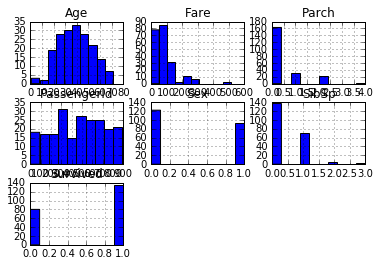

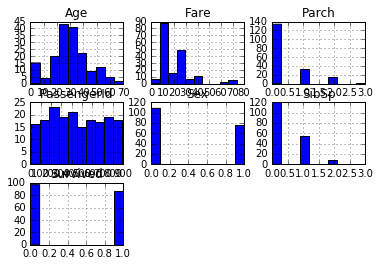

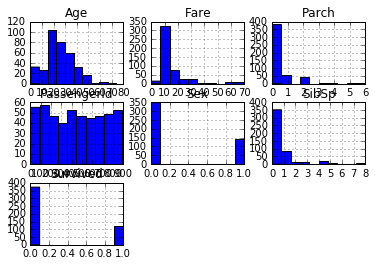

In [113]:
all.groupby("Pclass").hist()

In [116]:
third_class_women = women[women['Pclass'] == 3]

In [117]:
third_class_women.groupby('Embarked').describe()

Age       Fare      Parch  PassengerId  Pclass  \
Embarked                                                               
C        count  16.000000  23.000000  23.000000    23.000000    23.0   
         mean   14.062500  14.694926   0.826087   453.869565     3.0   
         std    11.662797   4.471080   0.886883   288.291567     0.0   
         min     0.750000   7.225000   0.000000    20.000000     3.0   
         25%     4.750000  13.935450   0.000000   191.000000     3.0   
         50%    14.250000  14.458300   1.000000   449.000000     3.0   
         75%    17.250000  17.500000   1.000000   697.500000     3.0   
         max    45.000000  22.358300   3.000000   876.000000     3.0   
Q        count  10.000000  33.000000  33.000000    33.000000    33.0   
         mean   22.850000  10.307833   0.242424   376.636364     3.0   
         std     8.171937   5.567107   0.936426   254.911114     0.0   
         min    15.000000   6.750000   0.000000    23.000000     3.0   
         25%    16.500000   7.750000   0.000000   187.000000     3.0   
         50%    20.000000   7.750000   0.000000   331.000000     3.0   
         75%    28.375000   8.029200   0.000000   613.000000     3.0   
         max    39.000000  29.125000   5.000000   886.000000     3.0   
S        count  76.000000  88.000000  88.000000    88.000000    88.0   
         mean   23.223684  18.670077   1.000000   394.238636     3.0   
         std    12.963126  13.720347   1.356127   267.311003     0.0   
         min     1.000000   7.250000   0.000000     3.000000     3.0   
         25%    16.750000   8.509375   0.000000   163.000000     3.0   
         50%    23.000000  14.450000   0.000000   396.000000     3.0   
         75%    30.250000  24.479175   2.000000   612.750000     3.0   
         max    63.000000  69.550000   6.000000   889.000000     3.0   

                    SibSp   Survived  
Embarked                              
C        count  23.000000  23.000000  
         mean    0.565217   0.652174  
         std     0.727767   0.486985  
         min     0.000000   0.000000  
         25%     0.000000   0.000000  
         50%     0.000000   1.000000  
         75%     1.000000   1.000000  
         max     2.000000   1.000000  
Q        count  33.000000  33.000000  
         mean    0.212121   0.727273  
         std     0.484612   0.452267  
         min     0.000000   0.000000  
         25%     0.000000   0.000000  
         50%     0.000000   1.000000  
         75%     0.000000   1.000000  
         max     2.000000   1.000000  
S        count  88.000000  88.000000  
         mean    1.238636   0.375000  
         std     1.819399   0.486897  
         min     0.000000   0.000000  
         25%     0.000000   0.000000  
         50%     1.000000   0.000000  
         75%     1.000000   1.000000  
         max     8.000000   1.000000

In [118]:
men.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S


In [119]:
third_class_men = men[men['Pclass']==3]

In [120]:
third_class_men.groupby('Embarked').describe()

Age        Fare       Parch  PassengerId  Pclass  \
Embarked                                                                  
C        count   25.000000   43.000000   43.000000    43.000000    43.0   
         mean    25.016800    9.352237    0.139535   450.209302     3.0   
         std      9.738603    4.009042    0.350605   275.750626     0.0   
         min      0.420000    4.012500    0.000000    27.000000     3.0   
         25%     20.000000    7.225000    0.000000   206.000000     3.0   
         50%     26.000000    7.229200    0.000000   523.000000     3.0   
         75%     30.000000    8.687500    0.000000   678.000000     3.0   
         max     45.500000   21.679200    1.000000   860.000000     3.0   
Q        count   14.000000   39.000000   39.000000    39.000000    39.0   
         mean    28.142857   11.924251    0.128205   457.333333     3.0   
         std     21.000392    7.555717    0.338688   261.479126     0.0   
         min      2.000000    6.750000    0.000000     6.000000     3.0   
         25%     10.750000    7.750000    0.000000   238.000000     3.0   
         50%     27.000000    7.750000    0.000000   460.000000     3.0   
         75%     38.000000   15.500000    0.000000   711.500000     3.0   
         max     70.500000   29.125000    1.000000   891.000000     3.0   
S        count  214.000000  265.000000  265.000000   265.000000   265.0   
         mean    26.574766   13.307149    0.252830   456.109434     3.0   
         std     11.699646   12.875992    0.685511   260.705568     0.0   
         min      1.000000    0.000000    0.000000     1.000000     3.0   
         25%     20.000000    7.795800    0.000000   211.000000     3.0   
         50%     25.000000    8.050000    0.000000   465.000000     3.0   
         75%     33.000000    9.845800    0.000000   684.000000     3.0   
         max     74.000000   69.550000    5.000000   885.000000     3.0   

                  Sex       SibSp    Survived  
Embarked                                       
C        count   43.0   43.000000   43.000000  
         mean     0.0    0.232558    0.232558  
         std      0.0    0.479941    0.427463  
         min      0.0    0.000000    0.000000  
         25%      0.0    0.000000    0.000000  
         50%      0.0    0.000000    0.000000  
         75%      0.0    0.000000    0.000000  
         max      0.0    2.000000    1.000000  
Q        count   39.0   39.000000   39.000000  
         mean     0.0    0.589744    0.076923  
         std      0.0    1.250641    0.269953  
         min      0.0    0.000000    0.000000  
         25%      0.0    0.000000    0.000000  
         50%      0.0    0.000000    0.000000  
         75%      0.0    0.500000    0.000000  
         max      0.0    4.000000    1.000000  
S        count  265.0  265.000000  265.000000  
         mean     0.0    0.528302    0.128302  
         std      0.0    1.379006    0.335058  
         min      0.0    0.000000    0.000000  
         25%      0.0    0.000000    0.000000  
         50%      0.0    0.000000    0.000000  
         75%      0.0    0.000000    0.000000  
         max      0.0    8.000000    1.000000

In [121]:
men.describe()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,577.000000,577.000000,577.000000,577.0,453.000000,577.000000,577.000000,577.000000
mean,454.147314,0.188908,2.389948,0.0,30.653797,0.429809,0.235702,25.523893
std,257.486139,0.391775,0.813580,0.0,14.514089,1.061811,0.612294,43.138263
min,1.000000,0.000000,1.000000,0.0,0.420000,0.000000,0.000000,0.000000
25%,222.000000,0.000000,2.000000,0.0,21.000000,0.000000,0.000000,7.895800
50%,464.000000,0.000000,3.000000,0.0,29.000000,0.000000,0.000000,10.500000
75%,680.000000,0.000000,3.000000,0.0,39.000000,0.000000,0.000000,26.550000
max,891.000000,1.000000,3.000000,0.0,74.000000,8.000000,5.000000,512.329200


In [122]:
second_class_men = men[men['Pclass'] == 2]


In [124]:
second_class_men.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,108.000000,108.000000,108.0,108.0,99.000000,108.000000,108.000000,108.000000
mean,447.962963,0.157407,2.0,0.0,30.740707,0.342593,0.222222,19.741782
std,256.922546,0.365882,0.0,0.0,14.793894,0.566380,0.517603,14.922235
min,18.000000,0.000000,2.0,0.0,0.670000,0.000000,0.000000,0.000000
25%,225.750000,0.000000,2.0,0.0,23.000000,0.000000,0.000000,12.331250
50%,416.500000,0.000000,2.0,0.0,30.000000,0.000000,0.000000,13.000000
75%,677.500000,0.000000,2.0,0.0,36.750000,1.000000,0.000000,26.000000
max,887.000000,1.000000,2.0,0.0,70.000000,2.000000,2.000000,73.500000


In [125]:
men.groupby('Pclass').describe()

Age        Fare       Parch  PassengerId    Sex  \
Pclass                                                                 
1      count  101.000000  122.000000  122.000000   122.000000  122.0   
       mean    40.954653   67.226127    0.278689   455.729508    0.0   
       std     14.643582   77.548021    0.658853   247.026449    0.0   
       min      0.920000    0.000000    0.000000     7.000000    0.0   
       25%     30.000000   27.728100    0.000000   255.500000    0.0   
       50%     40.000000   41.262500    0.000000   480.500000    0.0   
       75%     50.000000   78.459375    0.000000   660.750000    0.0   
       max     71.000000  512.329200    4.000000   890.000000    0.0   
2      count   99.000000  108.000000  108.000000   108.000000  108.0   
       mean    30.740707   19.741782    0.222222   447.962963    0.0   
       std     14.793894   14.922235    0.517603   256.922546    0.0   
       min      0.670000    0.000000    0.000000    18.000000    0.0   
       25%     23.000000   12.331250    0.000000   225.750000    0.0   
       50%     30.000000   13.000000    0.000000   416.500000    0.0   
       75%     36.750000   26.000000    0.000000   677.500000    0.0   
       max     70.000000   73.500000    2.000000   887.000000    0.0   
3      count  253.000000  347.000000  347.000000   347.000000  347.0   
       mean    26.507589   12.661633    0.224784   455.515850    0.0   
       std     12.159514   11.681696    0.623404   261.921251    0.0   
       min      0.420000    0.000000    0.000000     1.000000    0.0   
       25%     20.000000    7.750000    0.000000   209.500000    0.0   
       50%     25.000000    7.925000    0.000000   466.000000    0.0   
       75%     33.000000   10.008300    0.000000   687.500000    0.0   
       max     74.000000   69.550000    5.000000   891.000000    0.0   

                   SibSp    Survived  
Pclass                                
1      count  122.000000  122.000000  
       mean     0.311475    0.368852  
       std      0.546695    0.484484  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      1.000000    1.000000  
       max      3.000000    1.000000  
2      count  108.000000  108.000000  
       mean     0.342593    0.157407  
       std      0.566380    0.365882  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      1.000000    0.000000  
       max      2.000000    1.000000  
3      count  347.000000  347.000000  
       mean     0.498559    0.135447  
       std      1.288846    0.342694  
       min      0.000000    0.000000  
       25%      0.000000    0.000000  
       50%      0.000000    0.000000  
       75%      0.000000    0.000000  
       max      8.000000    1.000000

In [126]:
men.groupby('Pclass').corr()

Age      Fare     Parch  PassengerId  Sex     SibSp  \
Pclass                                                                         
1      Age          1.000000 -0.199374 -0.166751    -0.015976  NaN -0.139223   
       Fare        -0.199374  1.000000  0.450976    -0.004878  NaN  0.245073   
       Parch       -0.166751  0.450976  1.000000    -0.107895  NaN  0.238850   
       PassengerId -0.015976 -0.004878 -0.107895     1.000000  NaN -0.064423   
       Sex               NaN       NaN       NaN          NaN  NaN       NaN   
       SibSp       -0.139223  0.245073  0.238850    -0.064423  NaN  1.000000   
       Survived    -0.307421  0.073361  0.037775     0.223887  NaN  0.093096   
2      Age          1.000000 -0.196554 -0.367370    -0.016288  NaN -0.231664   
       Fare        -0.196554  1.000000  0.288426    -0.053746  NaN  0.581846   
       Parch       -0.367370  0.288426  1.000000     0.061907  NaN  0.343591   
       PassengerId -0.016288 -0.053746  0.061907     1.000000  NaN -0.007105   
       Sex               NaN       NaN       NaN          NaN  NaN       NaN   
       SibSp       -0.231664  0.581846  0.343591    -0.007105  NaN  1.000000   
       Survived    -0.422569  0.039381  0.356409    -0.054718  NaN  0.143231   
3      Age          1.000000 -0.333007 -0.302402     0.024975  NaN -0.466830   
       Fare        -0.333007  1.000000  0.574483    -0.031860  NaN  0.742452   
       Parch       -0.302402  0.574483  1.000000    -0.114791  NaN  0.633495   
       PassengerId  0.024975 -0.031860 -0.114791     1.000000  NaN -0.105069   
       Sex               NaN       NaN       NaN          NaN  NaN       NaN   
       SibSp       -0.466830  0.742452  0.633495    -0.105069  NaN  1.000000   
       Survived    -0.146657  0.099016  0.046472    -0.011922  NaN -0.048634   

                    Survived  
Pclass                        
1      Age         -0.307421  
       Fare         0.073361  
       Parch        0.037775  
       PassengerId  0.223887  
       Sex               NaN  
       SibSp        0.093096  
       Survived     1.000000  
2      Age         -0.422569  
       Fare         0.039381  
       Parch        0.356409  
       PassengerId -0.054718  
       Sex               NaN  
       SibSp        0.143231  
       Survived     1.000000  
3      Age         -0.146657  
       Fare         0.099016  
       Parch        0.046472  
       PassengerId -0.011922  
       Sex               NaN  
       SibSp       -0.048634  
       Survived     1.000000

In [127]:
all.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.652899,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,14.418327,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,74.000000,8.000000,6.000000,512.329200


In [128]:
children = all[all['Age']< 15]

In [129]:
children.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000
mean,423.717949,0.576923,2.628205,0.500000,5.816282,1.820513,1.320513,31.704435
std,282.756189,0.497245,0.605365,0.503236,4.320822,1.649428,0.654526,27.353590
min,8.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,7.229200
25%,172.250000,0.000000,2.000000,0.000000,2.000000,0.250000,1.000000,18.750000
50%,428.000000,1.000000,3.000000,0.500000,4.000000,1.000000,1.000000,27.000000
75%,690.750000,1.000000,3.000000,1.000000,9.000000,3.750000,2.000000,32.596875
max,870.000000,1.000000,3.000000,1.000000,14.500000,5.000000,2.000000,151.550000


In [130]:
children.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.090493,-0.031728,-0.097111,-0.034271,-0.086433,0.020985,-0.017807
Survived,0.090493,1.000000,-0.443057,0.077850,-0.233099,-0.663832,-0.136593,-0.053537
Pclass,-0.031728,-0.443057,1.000000,0.021315,0.091865,0.387525,-0.186995,-0.681269
Sex,-0.097111,0.077850,0.021315,1.000000,0.138358,-0.265982,-0.059143,-0.124083
Age,-0.034271,-0.233099,0.091865,0.138358,1.000000,0.045571,-0.198183,0.013355
SibSp,-0.086433,-0.663832,0.387525,-0.265982,0.045571,1.000000,0.282540,0.109287
Parch,0.020985,-0.136593,-0.186995,-0.059143,-0.198183,0.282540,1.000000,0.430846
Fare,-0.017807,-0.053537,-0.681269,-0.124083,0.013355,0.109287,0.430846,1.000000


Pclass
1    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
2    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
3    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
dtype: object

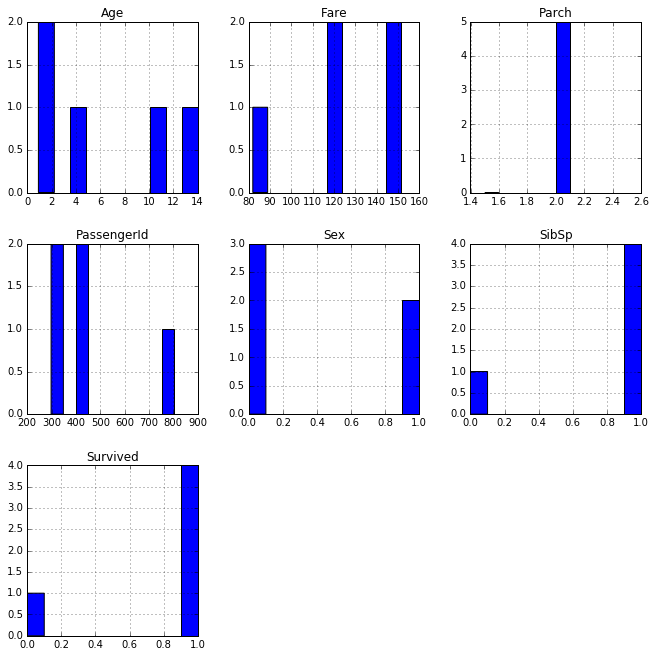

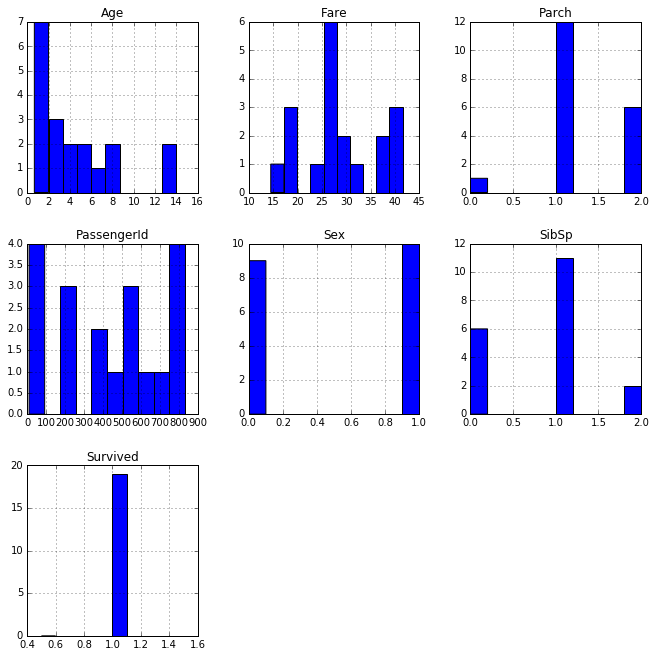

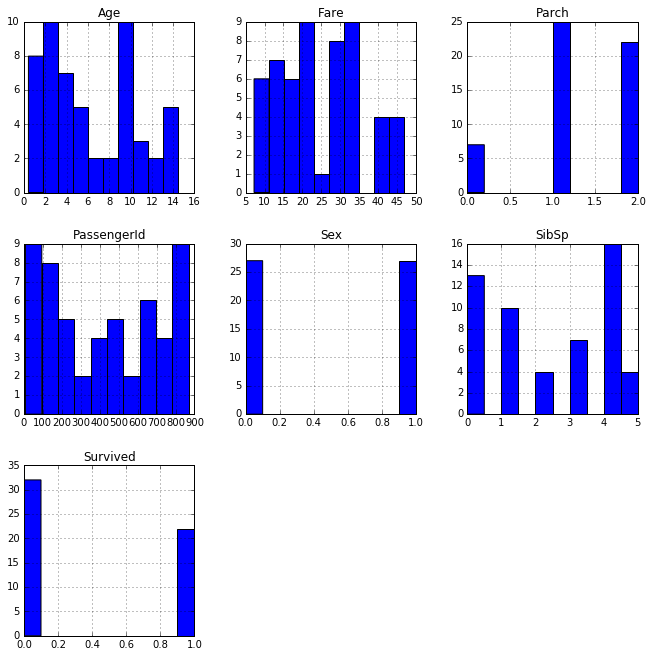

In [133]:
children.groupby('Pclass').hist(figsize=(11,11))


In [134]:
third_class_children = children[children['Pclass']==3]

Embarked
C    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
Q    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
S    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
dtype: object

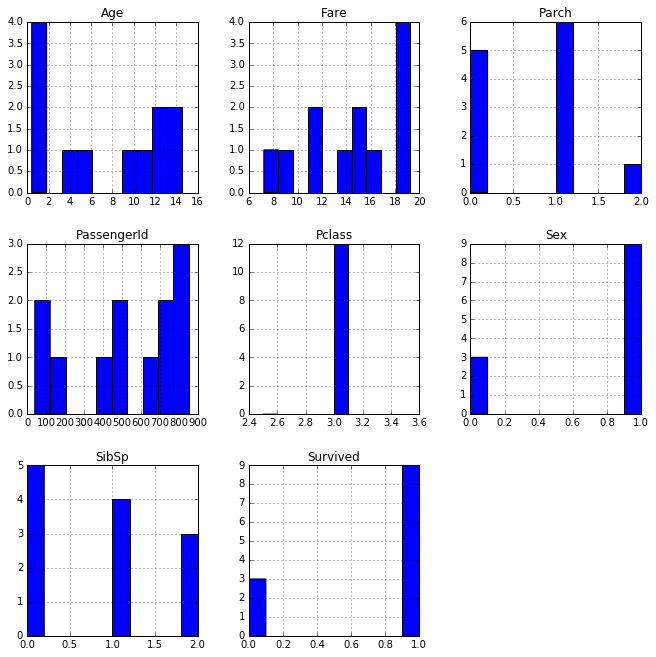

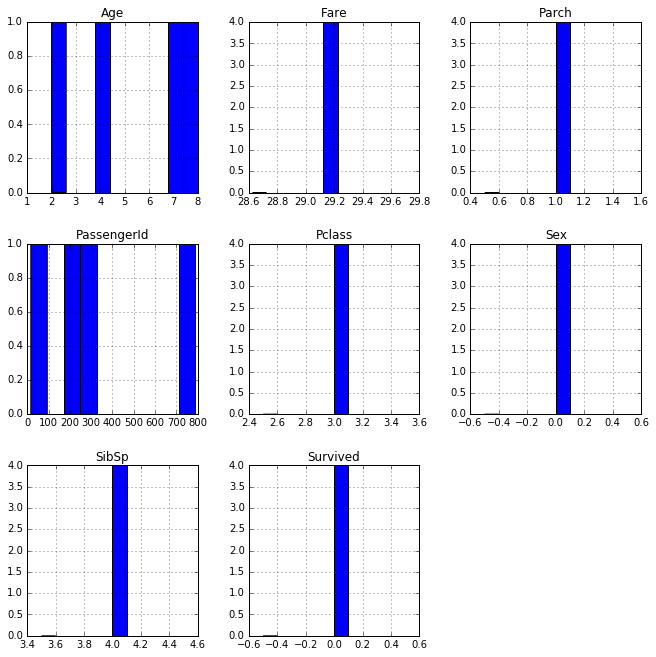

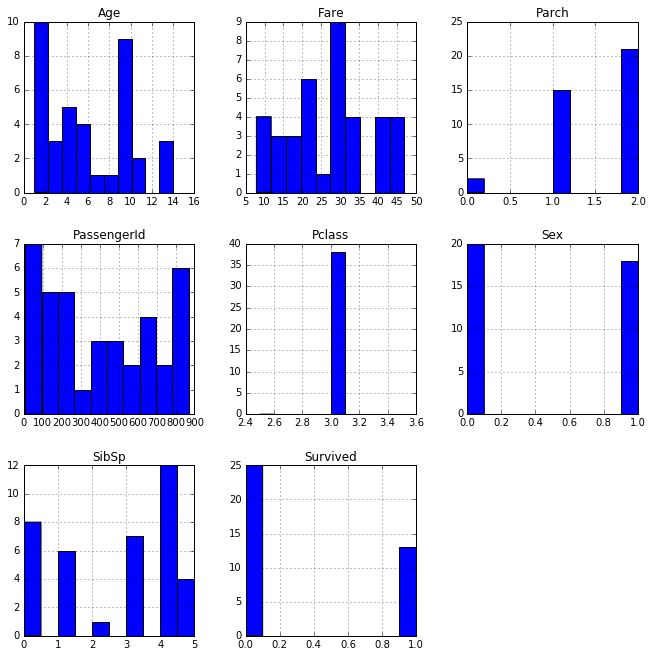

In [137]:
third_class_children.groupby('Embarked').hist(figsize=(11,11))

In [138]:
first_class_men = men[men['Pclass']==1]

In [139]:
first_class_men.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.223887,NaN,NaN,-0.015976,-0.064423,-0.107895,-0.004878
Survived,0.223887,1.000000,NaN,NaN,-0.307421,0.093096,0.037775,0.073361
Pclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,-0.015976,-0.307421,NaN,NaN,1.000000,-0.139223,-0.166751,-0.199374
SibSp,-0.064423,0.093096,NaN,NaN,-0.139223,1.000000,0.238850,0.245073
Parch,-0.107895,0.037775,NaN,NaN,-0.166751,0.238850,1.000000,0.450976
Fare,-0.004878,0.073361,NaN,NaN,-0.199374,0.245073,0.450976,1.000000


In [140]:
second_class_men = men[men['Pclass']==2]

In [141]:
second_class_men.corr()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.054718,NaN,NaN,-0.016288,-0.007105,0.061907,-0.053746
Survived,-0.054718,1.000000,NaN,NaN,-0.422569,0.143231,0.356409,0.039381
Pclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,-0.016288,-0.422569,NaN,NaN,1.000000,-0.231664,-0.367370,-0.196554
SibSp,-0.007105,0.143231,NaN,NaN,-0.231664,1.000000,0.343591,0.581846
Parch,0.061907,0.356409,NaN,NaN,-0.367370,0.343591,1.000000,0.288426
Fare,-0.053746,0.039381,NaN,NaN,-0.196554,0.581846,0.288426,1.000000


In [142]:
third_class_men = men[men['Pclass']==3]

In [143]:
third_class_men.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.011922,NaN,NaN,0.024975,-0.105069,-0.114791,-0.031860
Survived,-0.011922,1.000000,NaN,NaN,-0.146657,-0.048634,0.046472,0.099016
Pclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,0.024975,-0.146657,NaN,NaN,1.000000,-0.466830,-0.302402,-0.333007
SibSp,-0.105069,-0.048634,NaN,NaN,-0.466830,1.000000,0.633495,0.742452
Parch,-0.114791,0.046472,NaN,NaN,-0.302402,0.633495,1.000000,0.574483
Fare,-0.031860,0.099016,NaN,NaN,-0.333007,0.742452,0.574483,1.000000


In [144]:
third_class_men.describe()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,347.000000,347.000000,347.0,347.0,253.000000,347.000000,347.000000,347.000000
mean,455.515850,0.135447,3.0,0.0,26.507589,0.498559,0.224784,12.661633
std,261.921251,0.342694,0.0,0.0,12.159514,1.288846,0.623404,11.681696
min,1.000000,0.000000,3.0,0.0,0.420000,0.000000,0.000000,0.000000
25%,209.500000,0.000000,3.0,0.0,20.000000,0.000000,0.000000,7.750000
50%,466.000000,0.000000,3.0,0.0,25.000000,0.000000,0.000000,7.925000
75%,687.500000,0.000000,3.0,0.0,33.000000,0.000000,0.000000,10.008300
max,891.000000,1.000000,3.0,0.0,74.000000,8.000000,5.000000,69.550000


In [145]:
first_class_men.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,122.000000,122.000000,122.0,122.0,101.000000,122.000000,122.000000,122.000000
mean,455.729508,0.368852,1.0,0.0,40.954653,0.311475,0.278689,67.226127
std,247.026449,0.484484,0.0,0.0,14.643582,0.546695,0.658853,77.548021
min,7.000000,0.000000,1.0,0.0,0.920000,0.000000,0.000000,0.000000
25%,255.500000,0.000000,1.0,0.0,30.000000,0.000000,0.000000,27.728100
50%,480.500000,0.000000,1.0,0.0,40.000000,0.000000,0.000000,41.262500
75%,660.750000,1.000000,1.0,0.0,50.000000,1.000000,0.000000,78.459375
max,890.000000,1.000000,1.0,0.0,71.000000,3.000000,4.000000,512.329200


In [146]:
second_class_men.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,108.000000,108.000000,108.0,108.0,99.000000,108.000000,108.000000,108.000000
mean,447.962963,0.157407,2.0,0.0,30.740707,0.342593,0.222222,19.741782
std,256.922546,0.365882,0.0,0.0,14.793894,0.566380,0.517603,14.922235
min,18.000000,0.000000,2.0,0.0,0.670000,0.000000,0.000000,0.000000
25%,225.750000,0.000000,2.0,0.0,23.000000,0.000000,0.000000,12.331250
50%,416.500000,0.000000,2.0,0.0,30.000000,0.000000,0.000000,13.000000
75%,677.500000,0.000000,2.0,0.0,36.750000,1.000000,0.000000,26.000000
max,887.000000,1.000000,2.0,0.0,70.000000,2.000000,2.000000,73.500000


In [147]:
second_class_men.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.054718,NaN,NaN,-0.016288,-0.007105,0.061907,-0.053746
Survived,-0.054718,1.000000,NaN,NaN,-0.422569,0.143231,0.356409,0.039381
Pclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,-0.016288,-0.422569,NaN,NaN,1.000000,-0.231664,-0.367370,-0.196554
SibSp,-0.007105,0.143231,NaN,NaN,-0.231664,1.000000,0.343591,0.581846
Parch,0.061907,0.356409,NaN,NaN,-0.367370,0.343591,1.000000,0.288426
Fare,-0.053746,0.039381,NaN,NaN,-0.196554,0.581846,0.288426,1.000000


In [148]:
married_women.groupby('Pclass').describe()

Age        Fare      Parch  PassengerId      SibSp  \
Pclass                                                                   
1      count  36.000000   44.000000  44.000000    44.000000  44.000000   
       mean   40.611111   90.960702   0.363636   498.250000   0.772727   
       std    12.658769   50.628485   0.574291   267.173589   0.475621   
       min    17.000000   25.929200   0.000000     2.000000   0.000000   
       25%    35.000000   54.525000   0.000000   298.000000   0.750000   
       50%    41.500000   78.733350   0.000000   519.000000   1.000000   
       75%    50.250000  109.395825   1.000000   764.500000   1.000000   
       max    62.000000  247.520800   2.000000   880.000000   2.000000   
2      count  43.000000   43.000000  43.000000    43.000000  43.000000   
       mean   33.116279   23.310272   0.627907   440.837209   0.651163   
       std    10.413383    9.853717   0.873506   260.837838   0.686042   
       min    14.000000   10.500000   0.000000    10.000000   0.000000   
       25%    24.500000   15.125000   0.000000   254.000000   0.000000   
       50%    31.000000   26.000000   0.000000   433.000000   1.000000   
       75%    40.500000   26.000000   1.000000   640.000000   1.000000   
       max    57.000000   65.000000   3.000000   881.000000   3.000000   
3      count  33.000000   42.000000  42.000000    42.000000  42.000000   
       mean   33.515152   18.233529   1.452381   420.523810   0.619048   
       std    10.031579    8.718123   1.783425   277.843195   0.622833   
       min    15.000000    7.225000   0.000000     9.000000   0.000000   
       25%    27.000000   14.413550   0.000000   172.750000   0.000000   
       50%    31.000000   15.975000   1.000000   405.500000   1.000000   
       75%    40.000000   20.456250   2.000000   633.750000   1.000000   
       max    63.000000   46.900000   6.000000   886.000000   3.000000   

               Survived  
Pclass                   
1      count  44.000000  
       mean    0.977273  
       std     0.150756  
       min     0.000000  
       25%     1.000000  
       50%     1.000000  
       75%     1.000000  
       max     1.000000  
2      count  43.000000  
       mean    0.883721  
       std     0.324353  
       min     0.000000  
       25%     1.000000  
       50%     1.000000  
       75%     1.000000  
       max     1.000000  
3      count  42.000000  
       mean    0.500000  
       std     0.506061  
       min     0.000000  
       25%     0.000000  
       50%     0.500000  
       75%     1.000000  
       max     1.000000

In [149]:
married_women.groupby('Pclass').corr()

Age      Fare     Parch  PassengerId     SibSp  \
Pclass                                                                    
1      Age          1.000000 -0.084978  0.096605     0.164065 -0.238010   
       Fare        -0.084978  1.000000  0.425630    -0.000764 -0.105971   
       Parch        0.096605  0.425630  1.000000     0.225078 -0.201242   
       PassengerId  0.164065 -0.000764  0.225078     1.000000 -0.040537   
       SibSp       -0.238010 -0.105971 -0.201242    -0.040537  1.000000   
       Survived     0.211410 -0.184612 -0.439548    -0.000433 -0.073713   
2      Age          1.000000 -0.021100  0.083396     0.237594 -0.220817   
       Fare        -0.021100  1.000000  0.403952     0.228465  0.426921   
       Parch        0.083396  0.403952  1.000000     0.209249  0.215289   
       PassengerId  0.237594  0.228465  0.209249     1.000000  0.227331   
       SibSp       -0.220817  0.426921  0.215289     0.227331  1.000000   
       Survived    -0.087541  0.149375  0.179799     0.005962  0.027372   
3      Age          1.000000  0.334812  0.268492    -0.109038 -0.016087   
       Fare         0.334812  1.000000  0.826212     0.240867  0.163236   
       Parch        0.268492  0.826212  1.000000     0.242668 -0.192393   
       PassengerId -0.109038  0.240867  0.242668     1.000000 -0.249557   
       SibSp       -0.016087  0.163236 -0.192393    -0.249557  1.000000   
       Survived    -0.294034 -0.333033 -0.283758    -0.035734 -0.077382   

                    Survived  
Pclass                        
1      Age          0.211410  
       Fare        -0.184612  
       Parch       -0.439548  
       PassengerId -0.000433  
       SibSp       -0.073713  
       Survived     1.000000  
2      Age         -0.087541  
       Fare         0.149375  
       Parch        0.179799  
       PassengerId  0.005962  
       SibSp        0.027372  
       Survived     1.000000  
3      Age         -0.294034  
       Fare        -0.333033  
       Parch       -0.283758  
       PassengerId -0.035734  
       SibSp       -0.077382  
       Survived     1.000000

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x18d5c0ed0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x18dbe4d90>]], dtype=object)

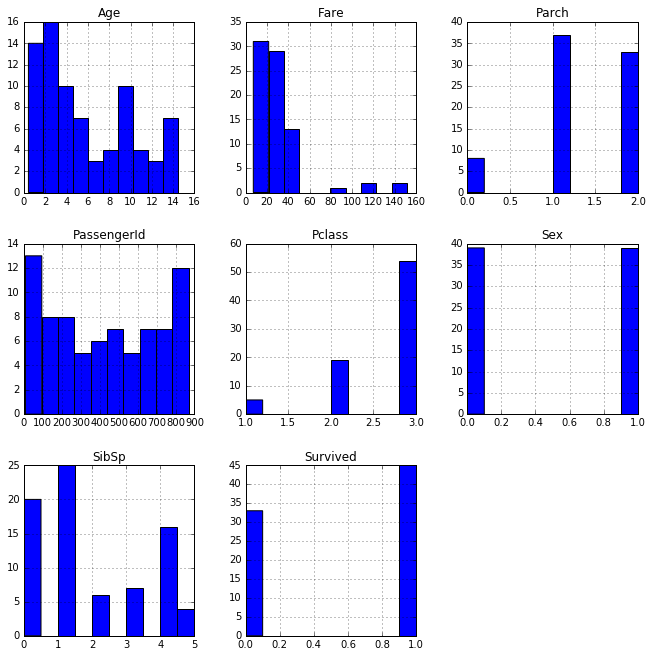

In [151]:
children.hist(figsize=(11,11))

Survived
0    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
1    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
dtype: object

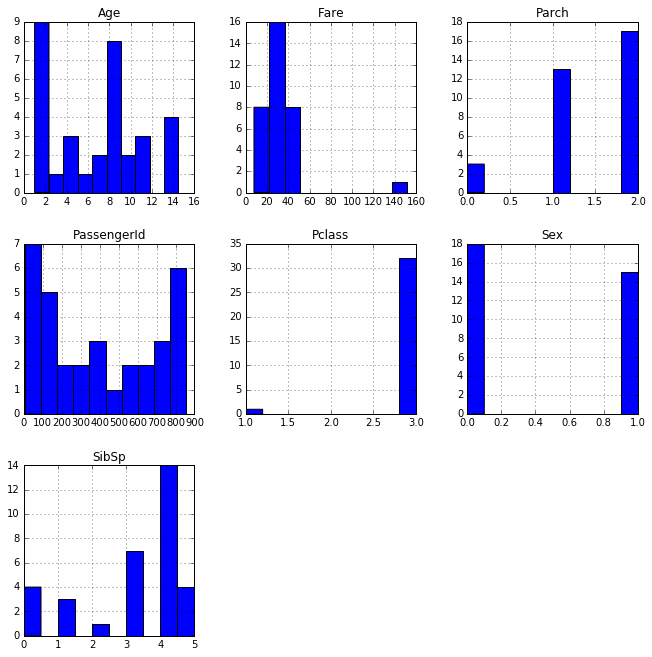

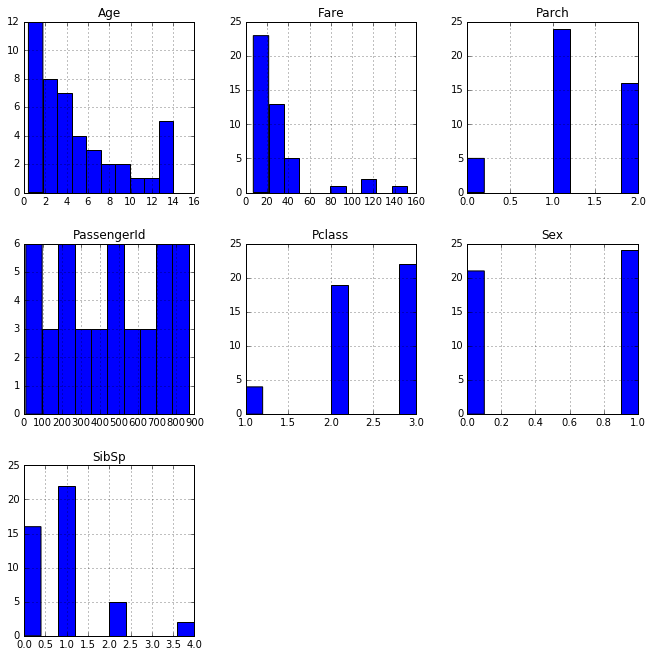

In [153]:
children.groupby('Survived').hist(figsize=(11,11))

In [83]:
third_class_children.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",1,4.0,1,1,PP 9549,16.7000,G6,S
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",1,14.0,0,0,350406,7.8542,NaN,S
16,17,0,3,"Rice, Master. Eugene",0,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",1,8.0,3,1,349909,21.0750,NaN,S


In [87]:
third_class_children = all[all['Pclass']==3.0]

In [88]:
third_class_children = third_class[third_class['Age'] < 15]

In [89]:
third_class_children.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,54.000000,54.000000,54.0,54.000000,54.000000,54.000000,54.000000,54.000000
mean,419.129630,0.407407,3.0,0.500000,6.211481,2.277778,1.277778,24.256174
std,292.907871,0.495966,0.0,0.504695,4.302470,1.763537,0.684510,11.061837
min,8.000000,0.000000,3.0,0.000000,0.420000,0.000000,0.000000,7.229200
25%,165.250000,0.000000,3.0,0.000000,2.000000,1.000000,1.000000,15.369775
50%,403.500000,0.000000,3.0,0.500000,5.000000,2.500000,1.000000,21.550000
75%,690.750000,1.000000,3.0,1.000000,9.000000,4.000000,2.000000,31.275000
max,870.000000,1.000000,3.0,1.000000,14.500000,5.000000,2.000000,46.900000


Embarked
C    [[Axes(0.125,0.125;0.775x0.775)]]
Q    [[Axes(0.125,0.125;0.775x0.775)]]
S    [[Axes(0.125,0.125;0.775x0.775)]]
dtype: object

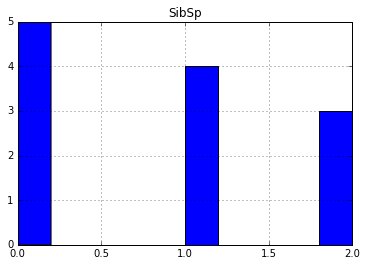

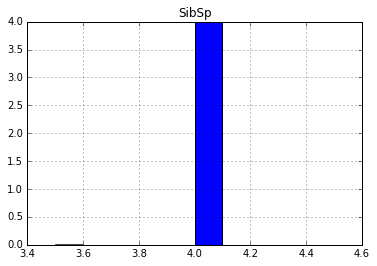

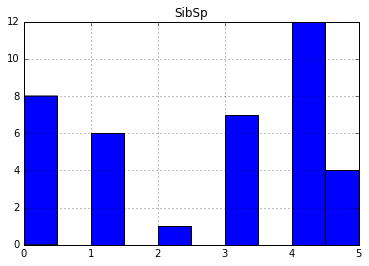

In [95]:
third_class_children.groupby('Embarked').hist('SibSp')

In [96]:
large_families_third = third_class_children[third_class_children['SibSp'] > 2]

In [97]:
large_families_third.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,27.000000,27.000000,27.0,27.000000,27.000000,27.000000,27.000000,27.000000
mean,396.851852,0.074074,3.0,0.333333,6.185185,3.888889,1.592593,32.896759
std,296.944660,0.266880,0.0,0.480384,3.922686,0.640513,0.500712,7.757976
min,8.000000,0.000000,3.0,0.000000,1.000000,3.000000,1.000000,21.075000
25%,142.500000,0.000000,3.0,0.000000,2.500000,3.500000,1.000000,28.512500
50%,375.000000,0.000000,3.0,0.000000,6.000000,4.000000,2.000000,31.275000
75%,663.500000,0.000000,3.0,1.000000,9.000000,4.000000,2.000000,39.687500
max,851.000000,1.000000,3.0,1.000000,14.000000,5.000000,2.000000,46.900000


In [101]:
other_families_third = third_class_children[third_class_children['SibSp'] <= 2]

In [103]:
other_families_third.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,27.000000,27.000000,27.0,27.000000,27.000000,27.000000,27.000000,27.000000
mean,441.407407,0.740741,3.0,0.666667,6.237778,0.666667,0.962963,15.615589
std,292.716489,0.446576,0.0,0.480384,4.727110,0.733799,0.706099,5.846890
min,11.000000,0.000000,3.0,0.000000,0.420000,0.000000,0.000000,7.229200
25%,169.500000,0.500000,3.0,0.000000,2.000000,0.000000,0.500000,11.241700
50%,449.000000,1.000000,3.0,1.000000,5.000000,1.000000,1.000000,15.245800
75%,742.000000,1.000000,3.0,1.000000,9.500000,1.000000,1.000000,19.258300
max,870.000000,1.000000,3.0,1.000000,14.500000,2.000000,2.000000,34.375000


In [104]:
third_class_children.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,54.000000,54.000000,54.0,54.000000,54.000000,54.000000,54.000000,54.000000
mean,419.129630,0.407407,3.0,0.500000,6.211481,2.277778,1.277778,24.256174
std,292.907871,0.495966,0.0,0.504695,4.302470,1.763537,0.684510,11.061837
min,8.000000,0.000000,3.0,0.000000,0.420000,0.000000,0.000000,7.229200
25%,165.250000,0.000000,3.0,0.000000,2.000000,1.000000,1.000000,15.369775
50%,403.500000,0.000000,3.0,0.500000,5.000000,2.500000,1.000000,21.550000
75%,690.750000,1.000000,3.0,1.000000,9.000000,4.000000,2.000000,31.275000
max,870.000000,1.000000,3.0,1.000000,14.500000,5.000000,2.000000,46.900000


In [105]:
third_class_children.groupby('Embarked').mean()['SibSp']

Embarked
C    0.833333
Q    4.000000
S    2.552632
Name: SibSp, dtype: float64

In [106]:
third_class_adults = third_class[third_class['Age'] >= 15]

In [107]:
third_class_adults.groupby('Embarked').describe()


Age        Fare       Parch  PassengerId  Pclass  \
Embarked                                                                  
C        count   29.000000   29.000000   29.000000    29.000000    29.0   
         mean    26.379310   10.086790    0.344828   472.275862     3.0   
         std      8.413059    4.250369    0.720905   279.652194     0.0   
         min     15.000000    4.012500    0.000000    58.000000     3.0   
         25%     20.000000    7.225000    0.000000   245.000000     3.0   
         50%     26.000000    7.229200    0.000000   456.000000     3.0   
         75%     30.000000   14.454200    0.000000   703.000000     3.0   
         max     45.500000   19.258300    3.000000   876.000000     3.0   
Q        count   20.000000   20.000000   20.000000    20.000000    20.0   
         mean    30.075000    9.512085    0.350000   436.400000     3.0   
         std     15.253365    5.216432    1.136708   285.793706     0.0   
         min     15.000000    6.750000    0.000000    23.000000     3.0   
         25%     19.000000    7.747925    0.000000   181.000000     3.0   
         50%     27.000000    7.750000    0.000000   462.000000     3.0   
         75%     33.750000    7.782300    0.000000   669.500000     3.0   
         max     70.500000   29.125000    5.000000   891.000000     3.0   
S        count  252.000000  252.000000  252.000000   252.000000   252.0   
         mean    28.662698   11.523244    0.301587   442.761905     3.0   
         std      9.956445    9.001081    0.951156   261.655758     0.0   
         min     16.000000    0.000000    0.000000     1.000000     3.0   
         25%     21.000000    7.795800    0.000000   206.500000     3.0   
         50%     26.000000    8.050000    0.000000   427.500000     3.0   
         75%     34.000000    9.825000    0.000000   676.250000     3.0   
         max     74.000000   56.495800    6.000000   885.000000     3.0   

                       Sex       SibSp    Survived  
Embarked                                            
C        count   29.000000   29.000000   29.000000  
         mean     0.241379    0.206897    0.310345  
         std      0.435494    0.412251    0.470824  
         min      0.000000    0.000000    0.000000  
         25%      0.000000    0.000000    0.000000  
         50%      0.000000    0.000000    0.000000  
         75%      0.000000    0.000000    1.000000  
         max      1.000000    1.000000    1.000000  
Q        count   20.000000   20.000000   20.000000  
         mean     0.500000    0.100000    0.300000  
         std      0.512989    0.307794    0.470162  
         min      0.000000    0.000000    0.000000  
         25%      0.000000    0.000000    0.000000  
         50%      0.500000    0.000000    0.000000  
         75%      1.000000    0.000000    1.000000  
         max      1.000000    1.000000    1.000000  
S        count  252.000000  252.000000  252.000000  
         mean     0.230159    0.305556    0.190476  
         std      0.421772    0.689917    0.393458  
         min      0.000000    0.000000    0.000000  
         25%      0.000000    0.000000    0.000000  
         50%      0.000000    0.000000    0.000000  
         75%      0.000000    0.000000    0.000000  
         max      1.000000    5.000000    1.000000

In [128]:
age_bins = pd.cut(third_class_adults['Age'].values, 20)


In [132]:
age_bins.describe()


,counts,freqs
categories,,
"(14.941, 17.95]",24,0.079734
"(17.95, 20.9]",46,0.152824
"(20.9, 23.85]",43,0.142857
"(23.85, 26.8]",41,0.136213
"(26.8, 29.75]",33,0.109635
"(29.75, 32.7]",32,0.106312
"(32.7, 35.65]",19,0.063123
"(35.65, 38.6]",12,0.039867
"(38.6, 41.55]",17,0.056478


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123407810>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x124c017d0>]], dtype=object)

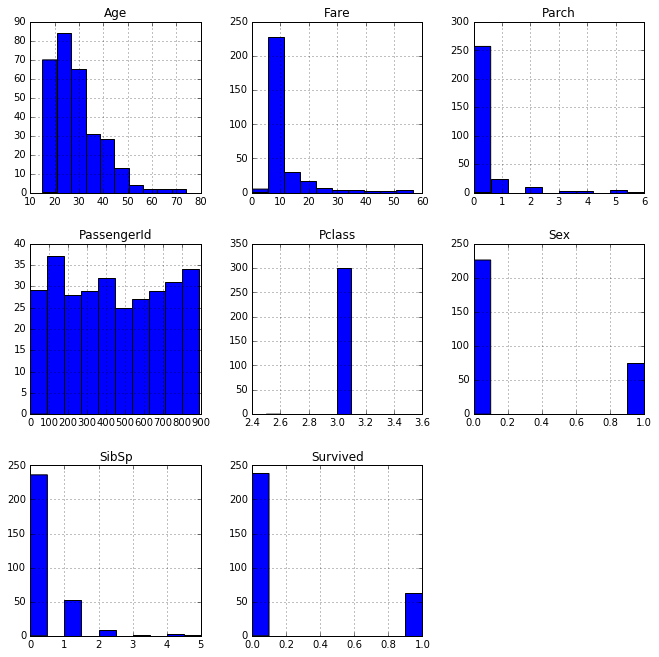

In [133]:
third_class_adults.hist(figsize=(11,11))



In [135]:
third_class_parents = third_class_adults[third_class_adults['Parch'] > 1]

Survived
0    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
1    [[Axes(0.125,0.684722;0.215278x0.215278), Axes...
dtype: object

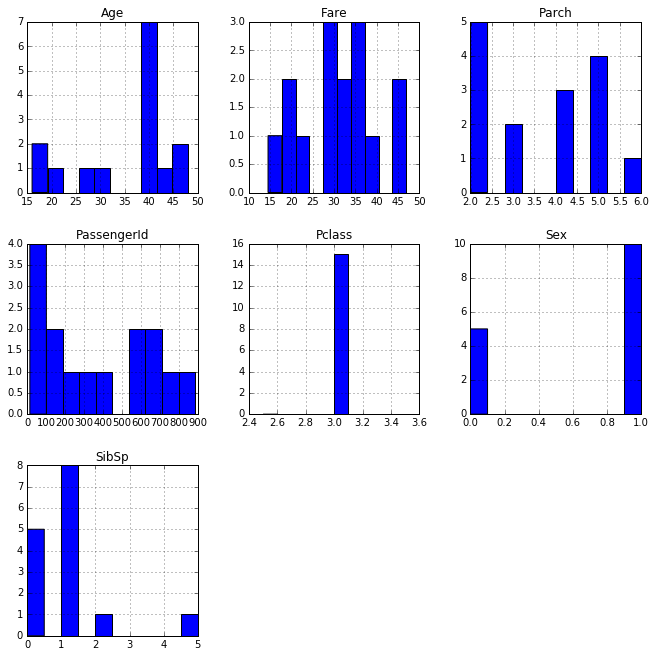

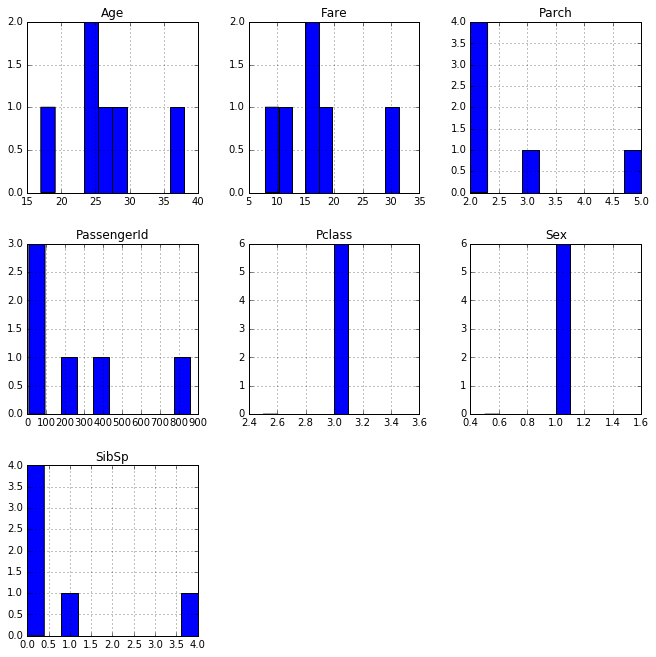

In [138]:
third_class_parents.groupby('Survived').hist(figsize=(11,11))


In [141]:
large_families_third.groupby('Survived').head(27)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,NaN,S
16,17,0,3,"Rice, Master. Eugene",0,2.0,4,1,382652,29.1250,NaN,Q
24,25,0,3,"Palsson, Miss. Torborg Danira",1,8.0,3,1,349909,21.0750,NaN,S
50,51,0,3,"Panula, Master. Juha Niilo",0,7.0,4,1,3101295,39.6875,NaN,S
59,60,0,3,"Goodwin, Master. William Frederick",0,11.0,5,2,CA 2144,46.9000,NaN,S
63,64,0,3,"Skoog, Master. Harald",0,4.0,3,2,347088,27.9000,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",1,2.0,4,2,347082,31.2750,NaN,S
164,165,0,3,"Panula, Master. Eino Viljami",0,1.0,4,1,3101295,39.6875,NaN,S
171,172,0,3,"Rice, Master. Arthur",0,4.0,4,1,382652,29.1250,NaN,Q
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",0,9.0,4,2,347077,31.3875,NaN,S


The two youngest Asplund children are the only survivors from large families in third class.  They were travelling with two parents.  What happened to them?

In [147]:
all[all['Name'].str.contains('Asplund')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",1,38.0,1,5,347077,31.3875,NaN,S
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",0,9.0,4,2,347077,31.3875,NaN,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",1,5.0,4,2,347077,31.3875,NaN,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",0,3.0,4,2,347077,31.3875,NaN,S


Looks like their mother made it out, but their father is not included in this record set. Note that a 9 year old boy was (probably) not considered a child. Some of the Asplunds (father and two children) are missing from this dataset.

Every other large family perished.  How many large families were there?  A bit of a challenge to figure this out, but let's just print out all large family children and see if we can eyeball it.


In [178]:
large_families_third.sort_values(by='Name')


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",0,4.0,4,2,347082,31.2750,NaN,S
813,814,0,3,"Andersson, Miss. Ebba Iris Alfrida",1,6.0,4,2,347082,31.2750,NaN,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",1,2.0,4,2,347082,31.2750,NaN,S
541,542,0,3,"Andersson, Miss. Ingeborg Constanzia",1,9.0,4,2,347082,31.2750,NaN,S
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",1,11.0,4,2,347082,31.2750,NaN,S
182,183,0,3,"Asplund, Master. Clarence Gustaf Hugo",0,9.0,4,2,347077,31.3875,NaN,S
261,262,1,3,"Asplund, Master. Edvin Rojj Felix",0,3.0,4,2,347077,31.3875,NaN,S
233,234,1,3,"Asplund, Miss. Lillian Gertrud",1,5.0,4,2,347077,31.3875,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",0,9.0,5,2,CA 2144,46.9000,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",0,1.0,5,2,CA 2144,46.9000,NaN,S


Anderssons, Asplunds, Goodwins, Palssons, Panulas, Rices, Skoogs = 7 large families.  All on at Southhampton except for the Rices, who got on in Queenstown.

Let's see if any of the parents survived.

In [150]:
third_class_adults[third_class_adults['Parch'] > 2]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",0,39.0,1,5,347082,31.2750,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",1,38.0,1,5,347077,31.3875,NaN,S
86,87,0,3,"Ford, Mr. William Neal",0,16.0,1,3,W./C. 6608,34.3750,NaN,S
167,168,0,3,"Skoog, Mrs. William (Anna Bernhardina Karlsson)",1,45.0,1,4,347088,27.9000,NaN,S
360,361,0,3,"Skoog, Mr. Wilhelm",0,40.0,1,4,347088,27.9000,NaN,S
567,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.0,0,4,349909,21.0750,NaN,S
610,611,0,3,"Andersson, Mrs. Anders Johan (Alfrida Konstant...",1,39.0,1,5,347082,31.2750,NaN,S
638,639,0,3,"Panula, Mrs. Juha (Maria Emilia Ojala)",1,41.0,0,5,3101295,39.6875,NaN,S
678,679,0,3,"Goodwin, Mrs. Frederick (Augusta Tyler)",1,43.0,1,6,CA 2144,46.9000,NaN,S
736,737,0,3,"Ford, Mrs. Edward (Margaret Ann Watson)",1,48.0,1,3,W./C. 6608,34.3750,NaN,S


We see that both parents died in the Andersson and Skoog families.  Mrs. Palsson, Panula, Rice and Goodwin also perished.  Only Mrs. Asplund survived with her two youngest children.  Judging by the SibSp and Parch, some records are missing, or there are family names that do not match up.  Let's look at the case of Mrs. Baclini.

In [151]:
third_class[third_class['Name'].str.contains('Baclini')]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
448,449,1,3,"Baclini, Miss. Marie Catherine",1,5.00,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",1,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",1,0.75,2,1,2666,19.2583,NaN,C
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",1,24.00,0,3,2666,19.2583,NaN,C


This shows that I mistakenly counted the mothers differently and should have used parch < 4 to correspond to SibSp > 2.
But what happens when I look at families of three?

In [153]:
third_class_children[third_class_children['SibSp']==2
                ]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",1,9.00,2,2,W./C. 6608,34.3750,NaN,S
448,449,1,3,"Baclini, Miss. Marie Catherine",1,5.00,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",1,0.75,2,1,2666,19.2583,NaN,C
644,645,1,3,"Baclini, Miss. Eugenie",1,0.75,2,1,2666,19.2583,NaN,C


This brings up the Ford and Baclini families, although records are incomplete for the Fords.  If their 9 year old daughter died, I don't give the Fords very good odds. (I checked and it's true.)

It's a little odd that family groupings were broken up (presumably) between the test and training sets.

Let's flip the lens and look at the first-class men.

In [157]:
first_class_men = men[(men['Pclass']==1) & (men['Age'] > 10)]

In [158]:
first_class_men.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,99.000000,99.000000,99.0,99.0,99.000000,99.000000,99.000000,99.000000
mean,453.444444,0.383838,1.0,0.0,41.732323,0.373737,0.303030,70.222349
std,248.690129,0.488794,0.0,0.0,13.708018,0.581796,0.676946,80.827614
min,7.000000,0.000000,1.0,0.0,11.000000,0.000000,0.000000,0.000000
25%,247.500000,0.000000,1.0,0.0,31.000000,0.000000,0.000000,29.100000
50%,485.000000,0.000000,1.0,0.0,42.000000,0.000000,0.000000,52.000000
75%,660.500000,1.000000,1.0,0.0,50.500000,1.000000,0.000000,79.200000
max,890.000000,1.000000,1.0,0.0,71.000000,3.000000,4.000000,512.329200


In [159]:
first_class_men.corr()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,0.278955,NaN,NaN,-0.035762,-0.057721,-0.105304,-0.000231
Survived,0.278955,1.000000,NaN,NaN,-0.264724,0.064515,-0.046725,0.078664
Pclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,-0.035762,-0.264724,NaN,NaN,1.000000,-0.137026,-0.047251,-0.182314
SibSp,-0.057721,0.064515,NaN,NaN,-0.137026,1.000000,0.201775,0.230444
Parch,-0.105304,-0.046725,NaN,NaN,-0.047251,0.201775,1.000000,0.466274
Fare,-0.000231,0.078664,NaN,NaN,-0.182314,0.230444,0.466274,1.000000


Husbands and fathers did not have a higher rate of survival.  Survival in the first class men was uncorrolated with any of the other attributes and was seemingly quite random.

In [160]:
second_class_men = men[(men['Pclass']==2) & (men['Age'] > 10)]

In [161]:
second_class_men.describe()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,90.000000,90.000000,90.0,90.0,90.000000,90.000000,90.000000,90.000000
mean,449.011111,0.066667,2.0,0.0,33.588889,0.322222,0.144444,20.493842
std,258.612612,0.250841,0.0,0.0,12.258127,0.557438,0.438617,15.059067
min,21.000000,0.000000,2.0,0.0,16.000000,0.000000,0.000000,10.500000
25%,227.500000,0.000000,2.0,0.0,25.000000,0.000000,0.000000,12.612500
50%,412.500000,0.000000,2.0,0.0,31.000000,0.000000,0.000000,13.000000
75%,682.250000,0.000000,2.0,0.0,39.000000,1.000000,0.000000,26.000000
max,887.000000,1.000000,2.0,0.0,70.000000,2.000000,2.000000,73.500000


OK, folks, look at this.  Almost 40% of first-class men lived, compared to 7% of second class men.  Second-class men had the absolute lowest rate of survival.  Even third-class men fared better (see below).

In [162]:
second_class_men.corr()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.063578,NaN,NaN,-0.007633,-0.000493,0.070909,-0.040761
Survived,-0.063578,1.000000,NaN,NaN,0.067480,-0.074998,-0.088507,-0.109946
Pclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,-0.007633,0.067480,NaN,NaN,1.000000,-0.084811,-0.013909,-0.151894
SibSp,-0.000493,-0.074998,NaN,NaN,-0.084811,1.000000,0.313002,0.593693
Parch,0.070909,-0.088507,NaN,NaN,-0.013909,0.313002,1.000000,0.227933
Fare,-0.040761,-0.109946,NaN,NaN,-0.151894,0.593693,0.227933,1.000000


Again, survival seems pretty random. Fathers and husbands were not more likely to survive.

In [163]:
third_class_men = men[(men['Pclass']==3) & (men['Age'] > 10)]

In [164]:
third_class_men.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,231.000000,231.00000,231.0,231.0,231.000000,231.000000,231.000000,231.000000
mean,457.129870,0.12987,3.0,0.0,28.575758,0.264069,0.147186,10.700647
std,258.092249,0.33689,0.0,0.0,10.567058,0.724994,0.571024,8.763980
min,1.000000,0.00000,3.0,0.0,11.000000,0.000000,0.000000,0.000000
25%,217.000000,0.00000,3.0,0.0,21.000000,0.000000,0.000000,7.750000
50%,462.000000,0.00000,3.0,0.0,26.000000,0.000000,0.000000,7.895800
75%,687.500000,0.00000,3.0,0.0,33.500000,0.000000,0.000000,8.662500
max,891.000000,1.00000,3.0,0.0,74.000000,5.000000,5.000000,56.495800


In [165]:
third_class_men.corr()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.049549,NaN,NaN,0.014775,-0.076282,-0.167049,-0.050943
Survived,-0.049549,1.000000,NaN,NaN,-0.056514,-0.069818,-0.077196,0.113704
Pclass,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,0.014775,-0.056514,NaN,NaN,1.000000,-0.206647,-0.016267,-0.109595
SibSp,-0.076282,-0.069818,NaN,NaN,-0.206647,1.000000,0.451825,0.519436
Parch,-0.167049,-0.077196,NaN,NaN,-0.016267,0.451825,1.000000,0.453509
Fare,-0.050943,0.113704,NaN,NaN,-0.109595,0.519436,0.453509,1.000000


In [166]:
third_class_men.groupby('Embarked').describe()

Age        Fare       Parch  PassengerId  Pclass  \
Embarked                                                                  
C        count   24.000000   24.000000   24.000000    24.000000    24.0   
         mean    26.041667    9.291504    0.125000   439.625000     3.0   
         std      8.459516    4.024057    0.337832   269.516445     0.0   
         min     11.000000    4.012500    0.000000    58.000000     3.0   
         25%     20.000000    7.225000    0.000000   207.000000     3.0   
         50%     26.000000    7.229200    0.000000   417.500000     3.0   
         75%     30.750000    9.307300    0.000000   670.000000     3.0   
         max     45.500000   18.787500    1.000000   848.000000     3.0   
Q        count   10.000000   10.000000   10.000000    10.000000    10.0   
         mean    37.300000    8.422500    0.100000   453.500000     3.0   
         std     17.561321    2.506442    0.316228   270.875638     0.0   
         min     19.000000    6.750000    0.000000   117.000000     3.0   
         25%     26.000000    7.743775    0.000000   212.000000     3.0   
         50%     31.500000    7.750000    0.000000   466.500000     3.0   
         75%     40.375000    7.750000    0.000000   659.500000     3.0   
         max     70.500000   15.500000    1.000000   891.000000     3.0   
S        count  197.000000  197.000000  197.000000   197.000000   197.0   
         mean    28.441624   10.987961    0.152284   459.446701     3.0   
         std     10.187547    9.346202    0.603694   257.351747     0.0   
         min     11.000000    0.000000    0.000000     1.000000     3.0   
         25%     21.000000    7.775000    0.000000   223.000000     3.0   
         50%     26.000000    7.925000    0.000000   466.000000     3.0   
         75%     34.000000    9.000000    0.000000   687.000000     3.0   
         max     74.000000   56.495800    5.000000   885.000000     3.0   

                  Sex       SibSp    Survived  
Embarked                                       
C        count   24.0   24.000000   24.000000  
         mean     0.0    0.250000    0.250000  
         std      0.0    0.442326    0.442326  
         min      0.0    0.000000    0.000000  
         25%      0.0    0.000000    0.000000  
         50%      0.0    0.000000    0.000000  
         75%      0.0    0.250000    0.250000  
         max      0.0    1.000000    1.000000  
Q        count   10.0   10.000000   10.000000  
         mean     0.0    0.100000    0.100000  
         std      0.0    0.316228    0.316228  
         min      0.0    0.000000    0.000000  
         25%      0.0    0.000000    0.000000  
         50%      0.0    0.000000    0.000000  
         75%      0.0    0.000000    0.000000  
         max      0.0    1.000000    1.000000  
S        count  197.0  197.000000  197.000000  
         mean     0.0    0.274112    0.116751  
         std      0.0    0.766645    0.321942  
         min      0.0    0.000000    0.000000  
         25%      0.0    0.000000    0.000000  
         50%      0.0    0.000000    0.000000  
         75%      0.0    0.000000    0.000000  
         max      0.0    5.000000    1.000000

Again, survival seems pretty random for the third-class men.  Although men that sailed out of Cherbourg were twice as likely to survive, the sample size is small.

Cherbourg passengers were muuch more likely to be Syrian/Lebanese.  The Syrian/Lebanese passengers had berths together in the bow of the ship.  There are accounts that they came up to the boat deck as a group.  Since many third-class passengers never made it to the boat deck, this may account for their increased odds of survival.

In the literature, it is often assumed that these immigrants, many of whom did not speak English, had a lower survival rate than the other passengers in steerage, but the data indicates the opposite.  

I'd like to do at least one scatter plot, just to figure out how it works.

In [172]:
import matplotlib.pyplot as plt


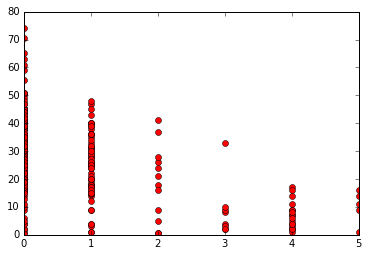

In [174]:
plt.plot(third_class['SibSp'], third_class['Age'], 'ro')

This is kind of a meaningless scatterplot, which shows that as you get to higher numbers of SibSp, the passengers are more likely to be under 20.  But, yay, scatterplot!

In [228]:
survival_by_embarcation = third_class.groupby('Embarked').mean()['Survived']


In [232]:
survival_by_embarcation

Embarked
C    0.378788
Q    0.375000
S    0.189802
Name: Survived, dtype: float64

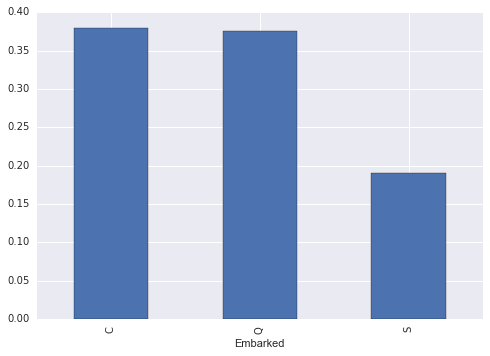

In [257]:
survival_by_embarcation.plot.bar()

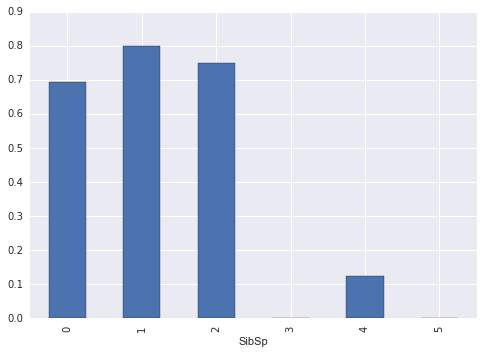

In [258]:
third_class_children.groupby('SibSp').mean()['Survived'].plot.bar()

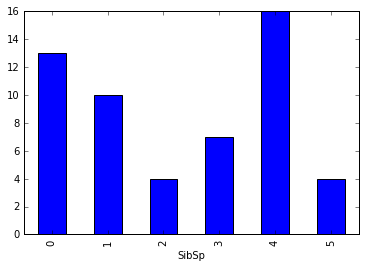

In [242]:
third_class_children.groupby('SibSp').count()['PassengerId'].plot.bar()

OrderedDict([(0,
              {'boxes': [<matplotlib.lines.Line2D at 0x133d27590>],
               'caps': [<matplotlib.lines.Line2D at 0x133d19b10>,
               'fliers': [<matplotlib.lines.Line2D at 0x133d34710>],
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x133d340d0>],
               'whiskers': [<matplotlib.lines.Line2D at 0x133d27710>,
                <matplotlib.lines.Line2D at 0x133d1f210>]}),
             (1,
              {'boxes': [<matplotlib.lines.Line2D at 0x133d402d0>],
               'caps': [<matplotlib.lines.Line2D at 0x133d40ed0>,
               'fliers': [<matplotlib.lines.Line2D at 0x133d58210>],
               'means': [],
               'medians': [<matplotlib.lines.Line2D at 0x133d4ab90>],
               'whiskers': [<matplotlib.lines.Line2D at 0x133d27390>,
                <matplotlib.lines.Line2D at 0x133d408d0>]}),
             (2,
              {'boxes': [<matplotlib.lines.Line2D at 0x133d58e10>],
               'c

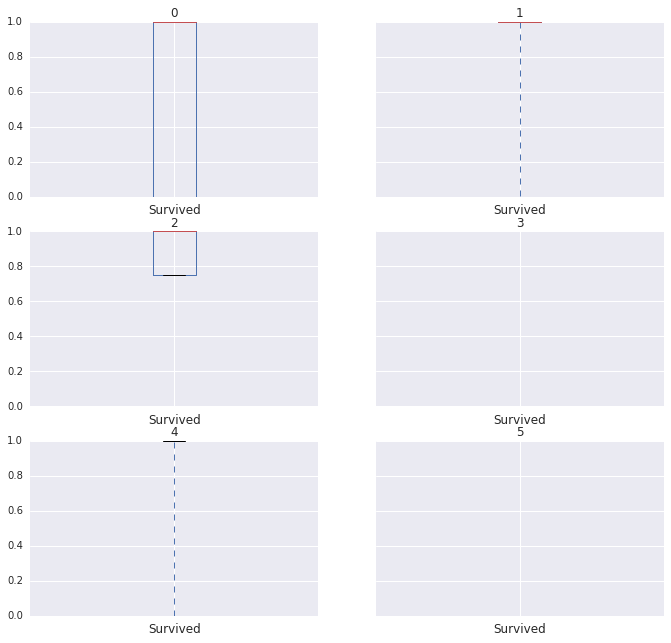

In [259]:
third_class_children.groupby('SibSp').boxplot(column='Survived',figsize=(11,11))

In [256]:
import seaborn as sns